In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rc('axes', unicode_minus=False)
from matplotlib import font_manager, rc


# 한글 폰트 깨짐 방지
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [2]:
df = pd.read_csv("C:/Users/eagls/Downloads/제주특별자치도_개별관광(FIT)_증가에_따른_제주_관광객_소비패턴_변화_분석_BC카드_빅데이터_내국인관광객_20170216/제주특별자치도_개별관광(FIT)_증가에_따른_제주_관광객_소비패턴_변화_분석_BC카드_빅데이터_내국인관광객_20170216.csv", encoding='euc-kr')

In [3]:
df

,기준년월,관광객 유형,제주 대분류,제주 중분류,업종명,성별,연령대별,카드이용금액,카드이용건수,건당이용금액,데이터기준일자
0,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,여,50대,14434000,67,215433,2017-02-16
1,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,남,50대,15119000,72,209986,2017-02-16
2,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,여,40대,7609500,41,185598,2017-02-16
3,2014-09,내국인 관광객,서귀포시,남원읍,농축수산품,남,50대,7092500,40,177313,2017-02-16
4,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,남,40대,9098500,59,154212,2017-02-16
...,...,...,...,...,...,...,...,...,...,...,...
13141,2016-08,내국인 관광객,서귀포시,남원읍,약국,남,30대,252900,43,5881,2017-02-16
13142,2016-08,내국인 관광객,서귀포시,대륜동,약국,남,20대,276100,49,5635,2017-02-16
13143,2016-08,내국인 관광객,서귀포시,대륜동,기타음료식품,남,30대,610850,118,5177,2017-02-16
13144,2016-08,내국인 관광객,서귀포시,대륜동,기타음료식품,여,20대,416900,85,4905,2017-02-16


In [4]:
df.isnull().sum()

기준년월        0
관광객 유형      0
제주 대분류      0
제주 중분류      0
업종명         0
성별          0
연령대별        0
 카드이용금액     0
 카드이용건수     0
건당이용금액      0
데이터기준일자     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(13146, 11)

In [7]:
df.describe()

,카드이용금액,카드이용건수,건당이용금액
count,1.314600e+04,13146.000000,13146.000000
mean,3.697184e+06,133.308079,35163.811273
std,6.232327e+06,210.459082,35421.702281
min,3.610000e+04,10.000000,3520.000000
25%,5.958600e+05,23.000000,13939.250000
50%,1.533550e+06,54.000000,21007.500000
75%,3.863175e+06,143.000000,46235.750000
max,6.427770e+07,2574.000000,539047.000000


In [8]:
print(df.columns)  # Print column names
print(df.dtypes)   # Print data types of columns


Index(['기준년월', '관광객 유형', '제주 대분류', '제주 중분류', '업종명', '성별', '연령대별', ' 카드이용금액 ',
       ' 카드이용건수 ', '건당이용금액', '데이터기준일자'],
      dtype='object')
기준년월        object
관광객 유형      object
제주 대분류      object
제주 중분류      object
업종명         object
성별          object
연령대별        object
 카드이용금액      int64
 카드이용건수      int64
건당이용금액       int64
데이터기준일자     object
dtype: object


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13146 entries, 0 to 13145
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기준년월      13146 non-null  object
 1   관광객 유형    13146 non-null  object
 2   제주 대분류    13146 non-null  object
 3   제주 중분류    13146 non-null  object
 4   업종명       13146 non-null  object
 5   성별        13146 non-null  object
 6   연령대별      13146 non-null  object
 7    카드이용금액   13146 non-null  int64 
 8    카드이용건수   13146 non-null  int64 
 9   건당이용금액    13146 non-null  int64 
 10  데이터기준일자   13146 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.1+ MB


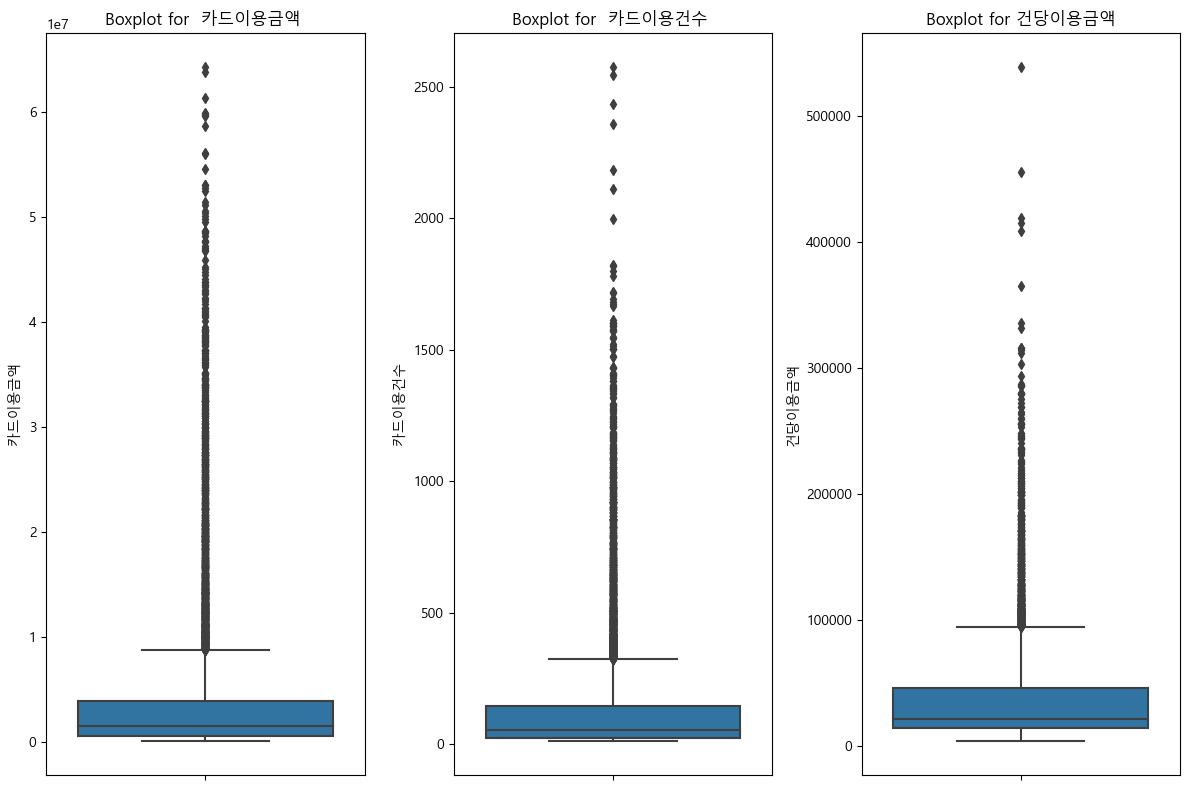

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))
target_data = [' 카드이용금액 ', ' 카드이용건수 ', '건당이용금액']
for i, column in enumerate(target_data):
    sns.boxplot(y=column, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [11]:
df[['년', '월']] = df['기준년월'].str.split('-', expand=True)

# If you want to convert the new columns to numeric values, you can do:
df['년'] = pd.to_numeric(df['년'])
df['월'] = pd.to_numeric(df['월'])



In [12]:
year = df.groupby('년')['년'].value_counts().reset_index()

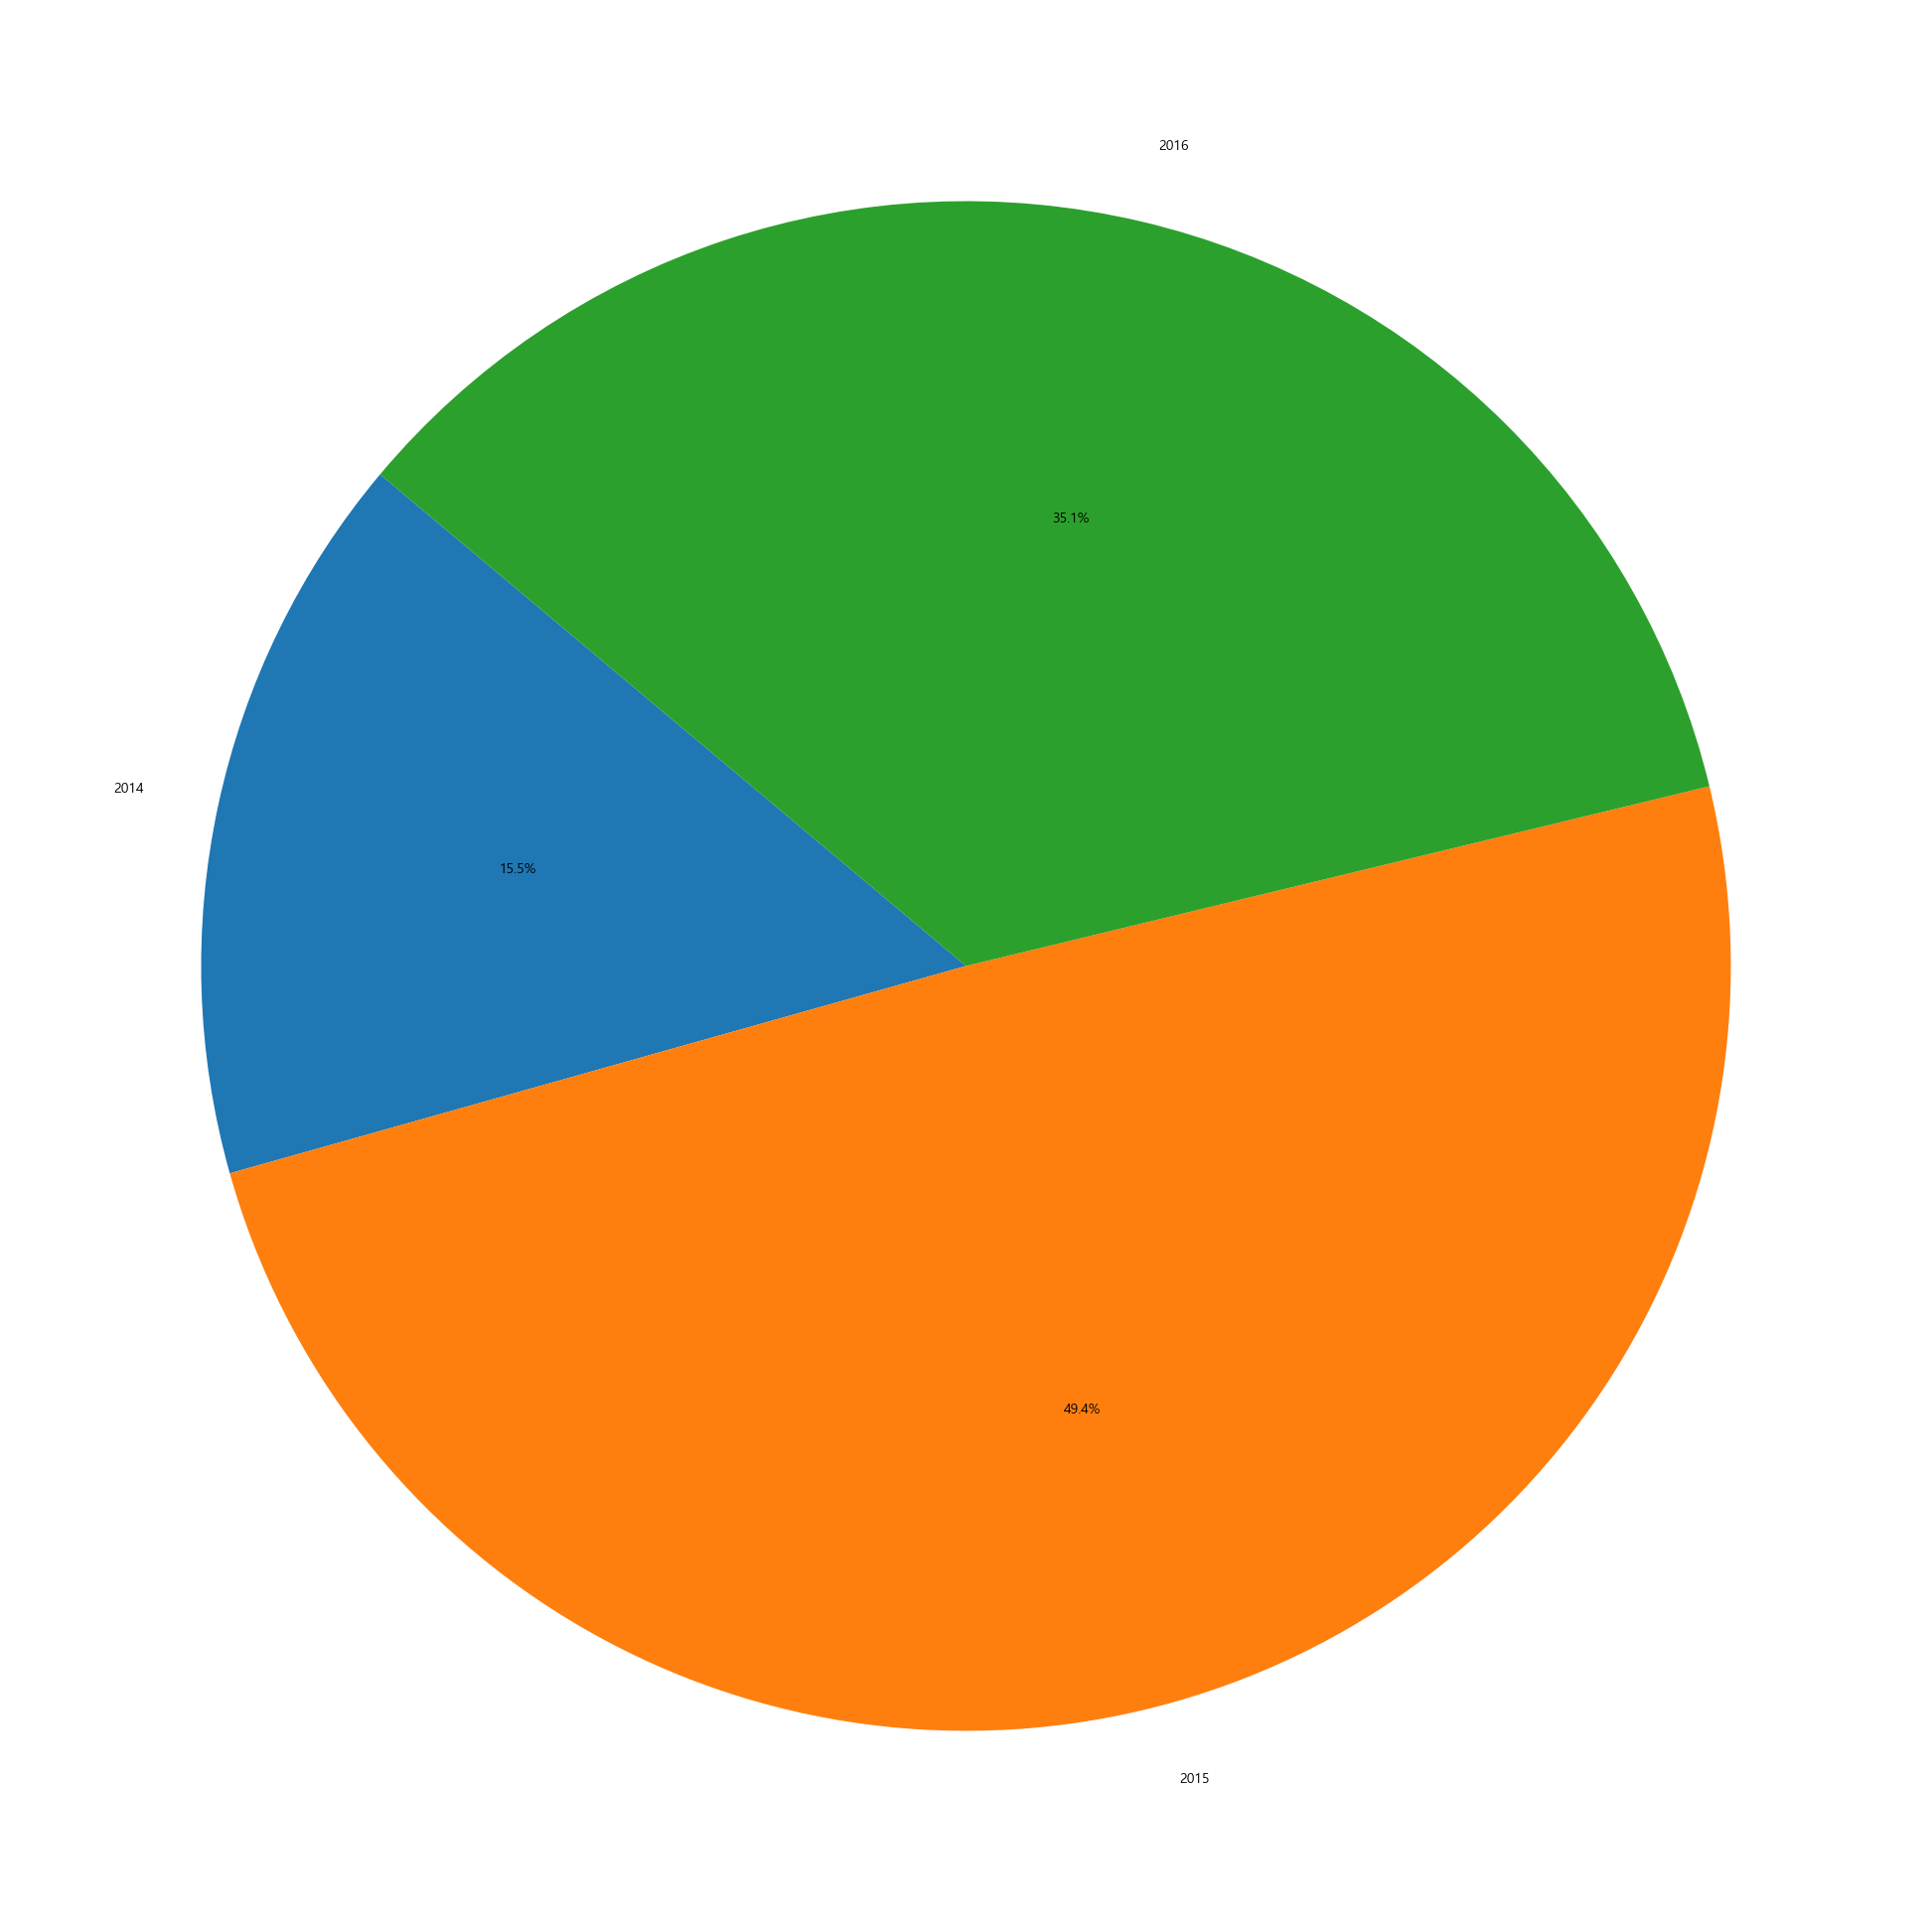

In [13]:
plt.figure(figsize=(25, 25))
plt.pie(year['count'], labels=year['년'], autopct='%1.1f%%', startangle=140)
plt.show()

- 2015년도 데이터가 제일많음을 알 수 있다

In [14]:
month = df.groupby('월')['월'].value_counts().reset_index()

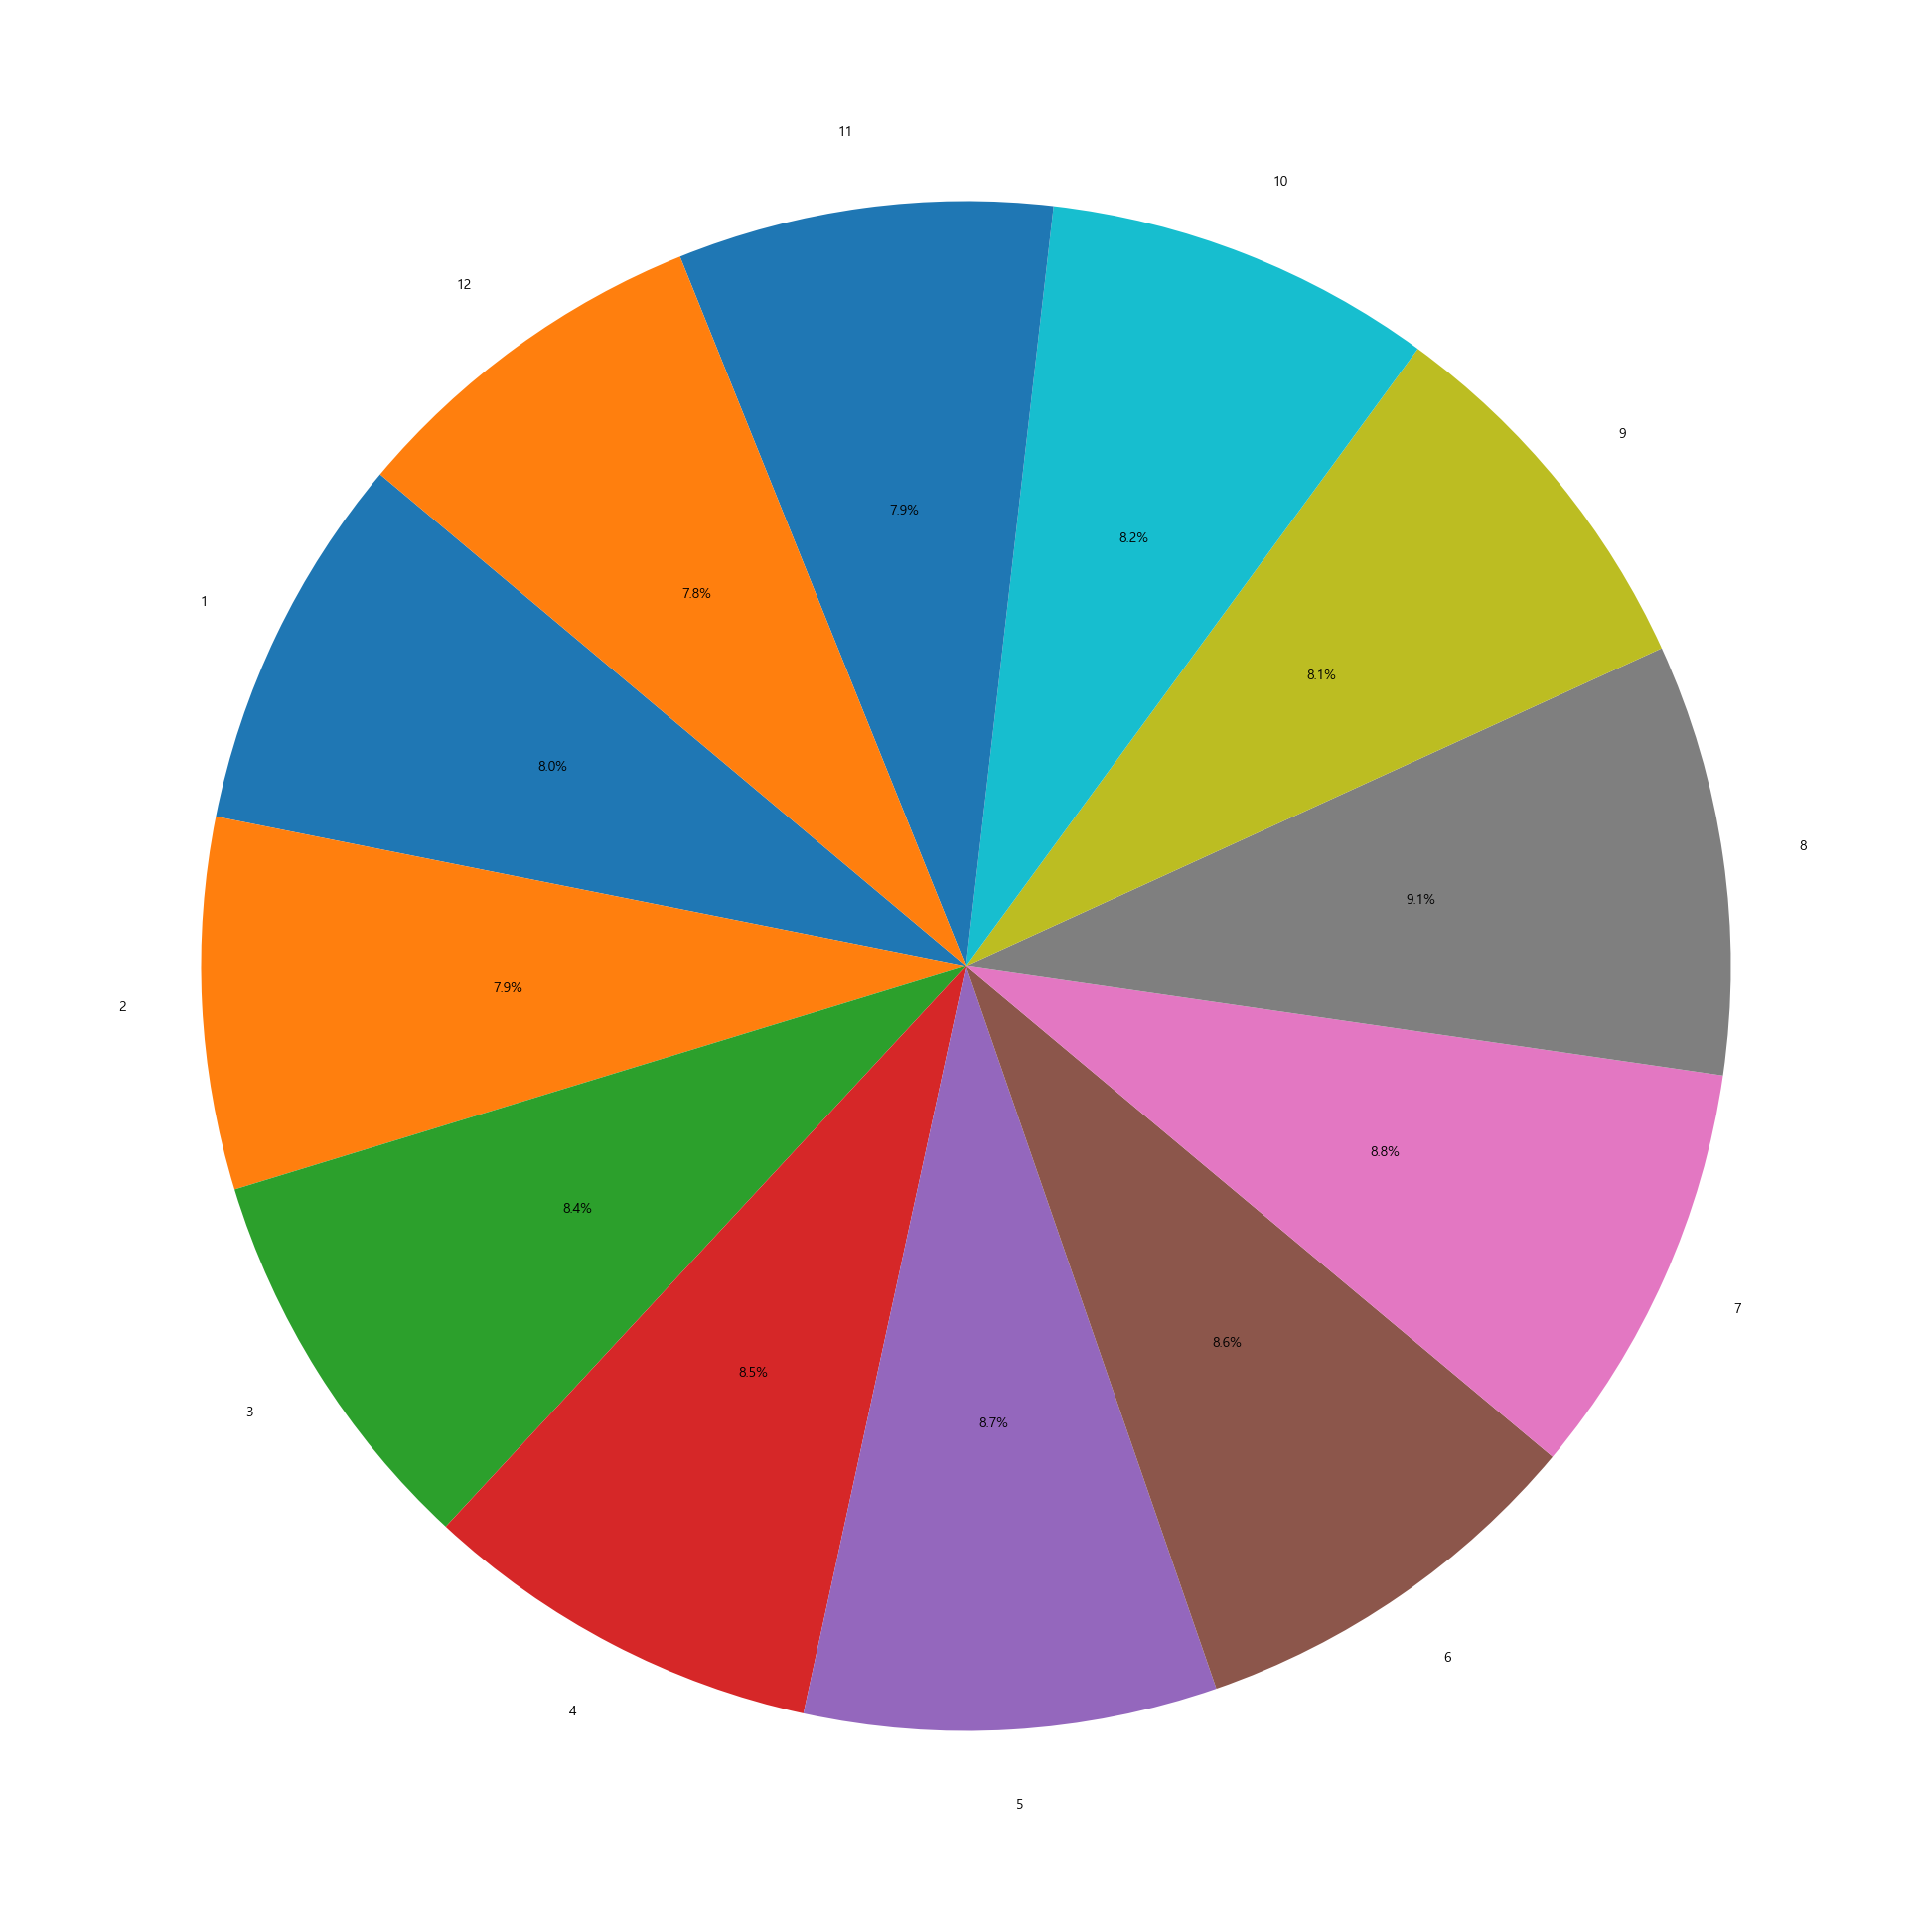

In [15]:
plt.figure(figsize=(25, 25))
plt.pie(month['count'], labels=month['월'], autopct='%1.1f%%', startangle=140)
plt.show()

- 특출나게 손님이 많은 월이 업이 엇비슷하게 균등하게 배분되어있다

In [16]:
gender = df.groupby('성별')['성별'].count().reset_index(name='count')

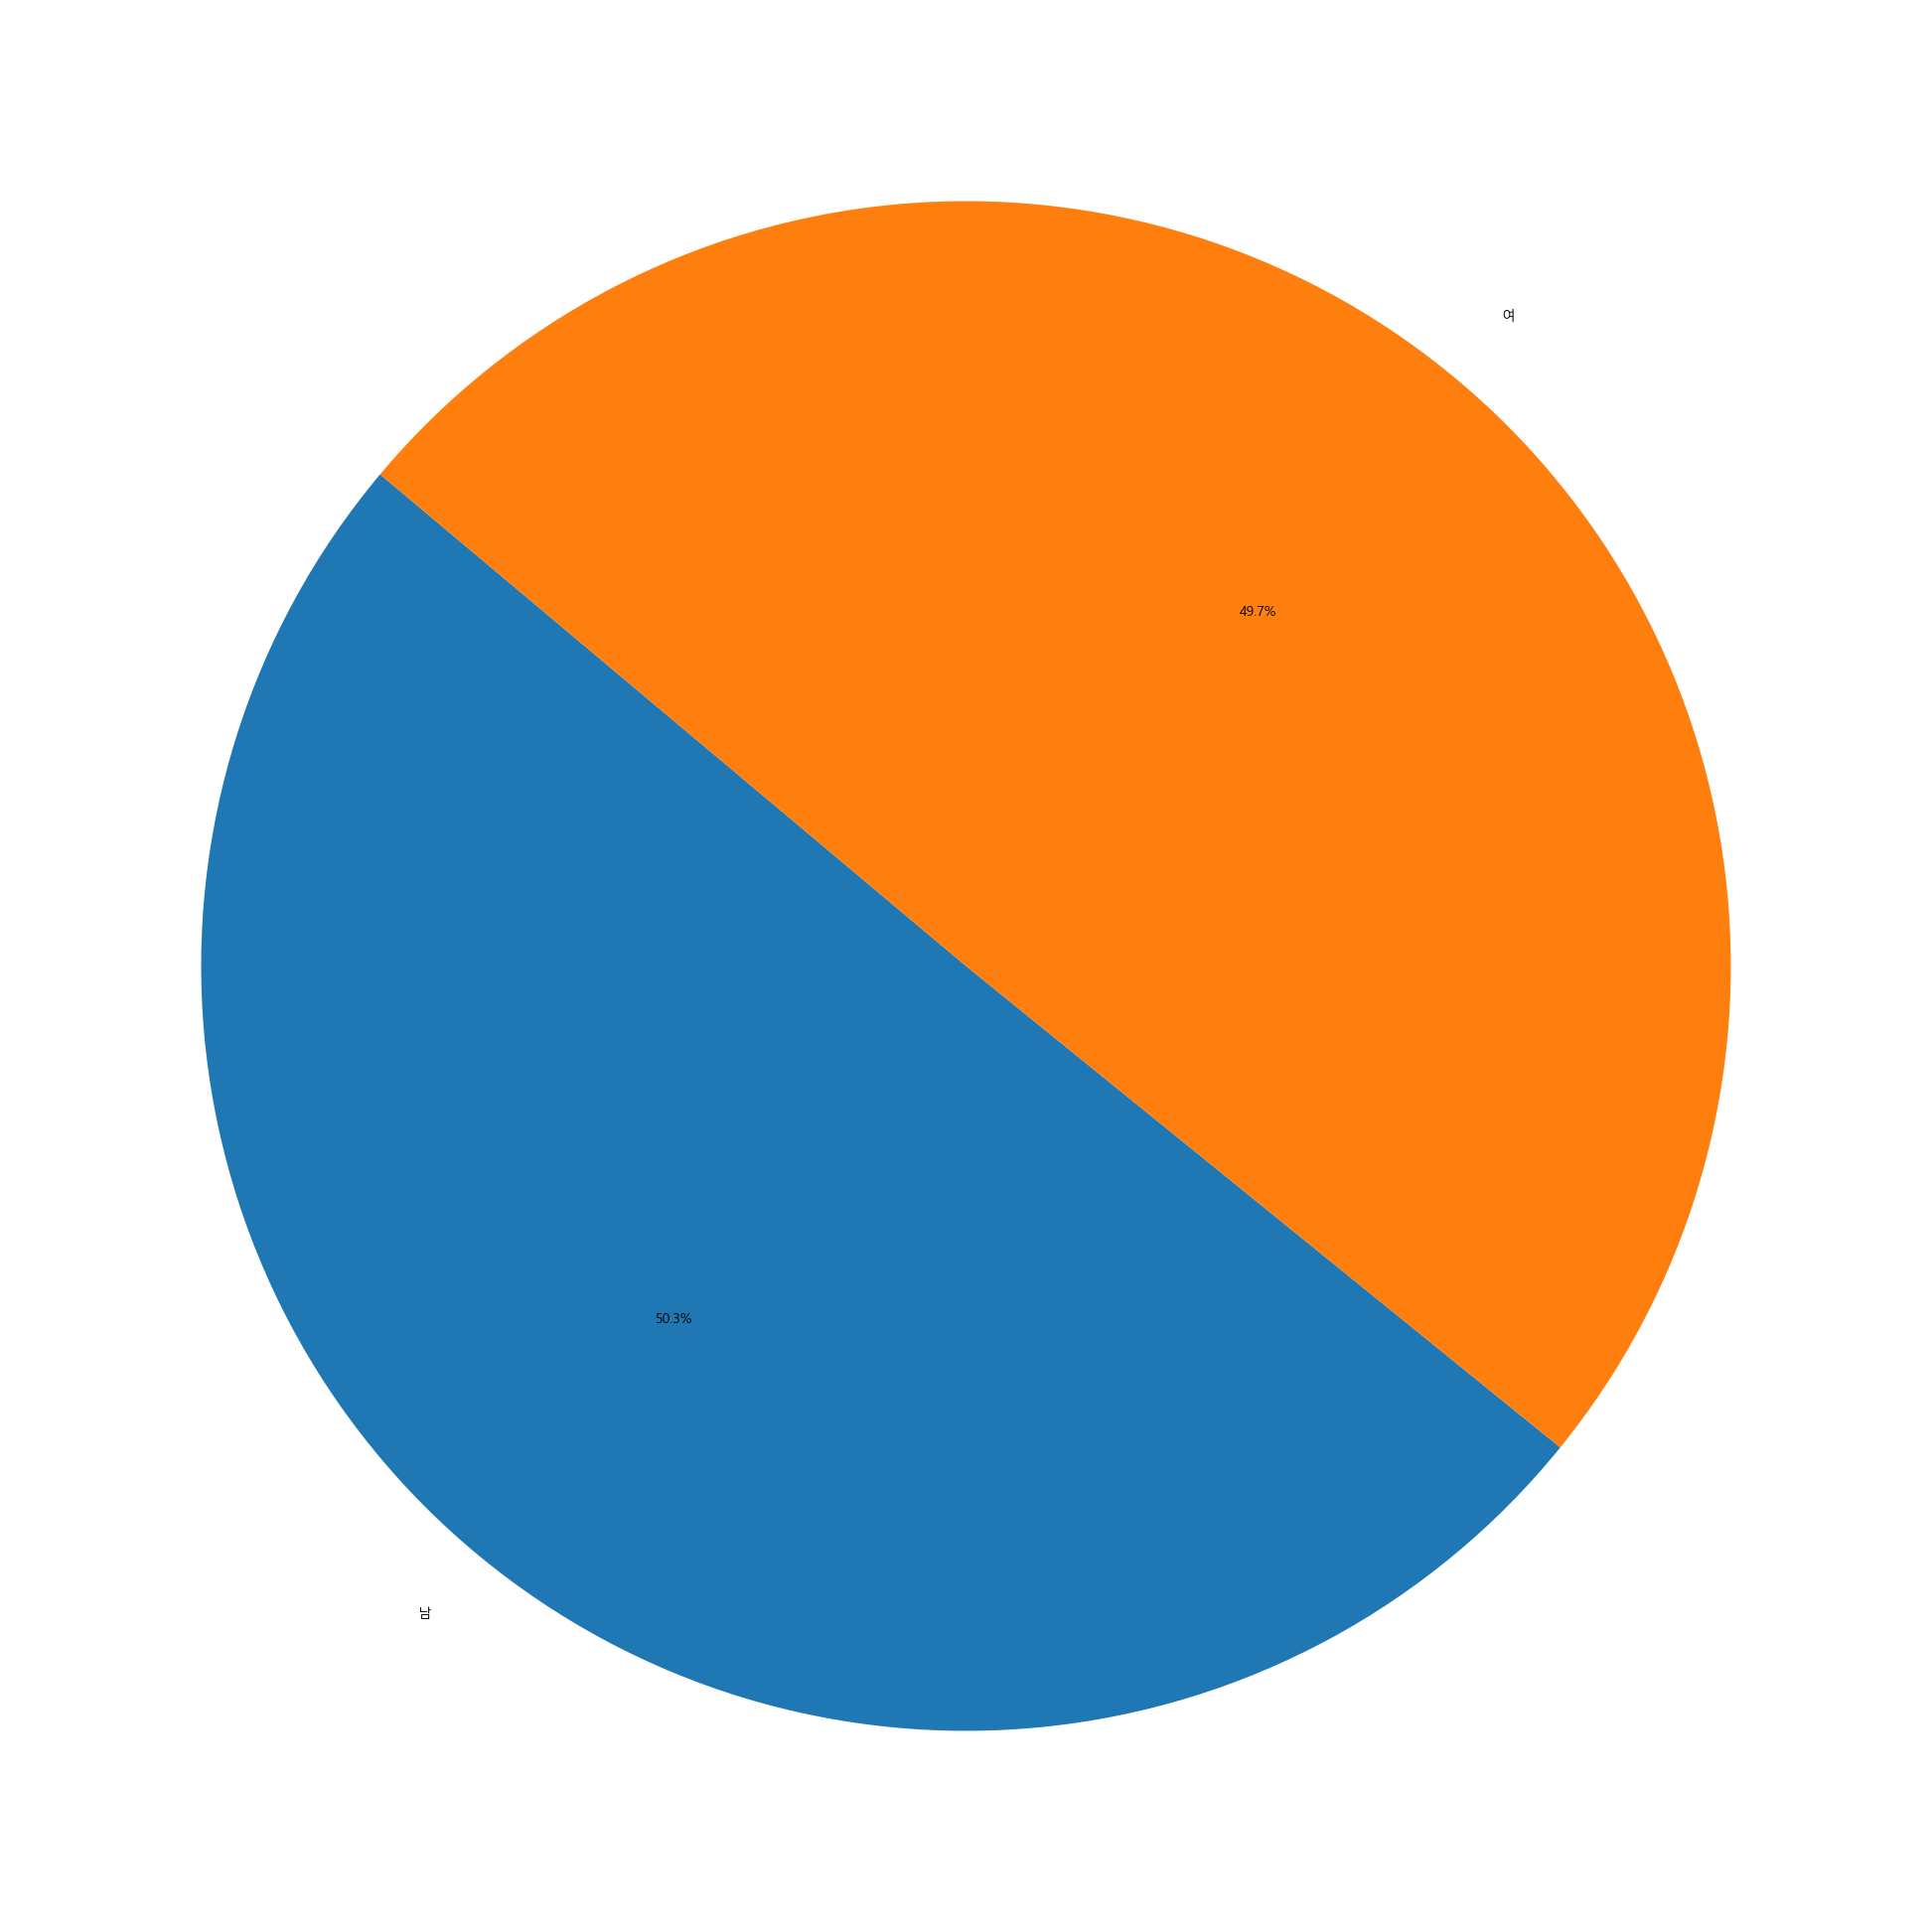

In [17]:
plt.figure(figsize=(25, 25))
plt.pie(gender['count'], labels=gender['성별'], autopct='%1.1f%%', startangle=140)
plt.show()

- 데이터내 남녀 비율을 거의 동일하다

In [18]:
age_type = df.groupby(['연령대별','업종명'])['업종명'].count().reset_index(name='count')

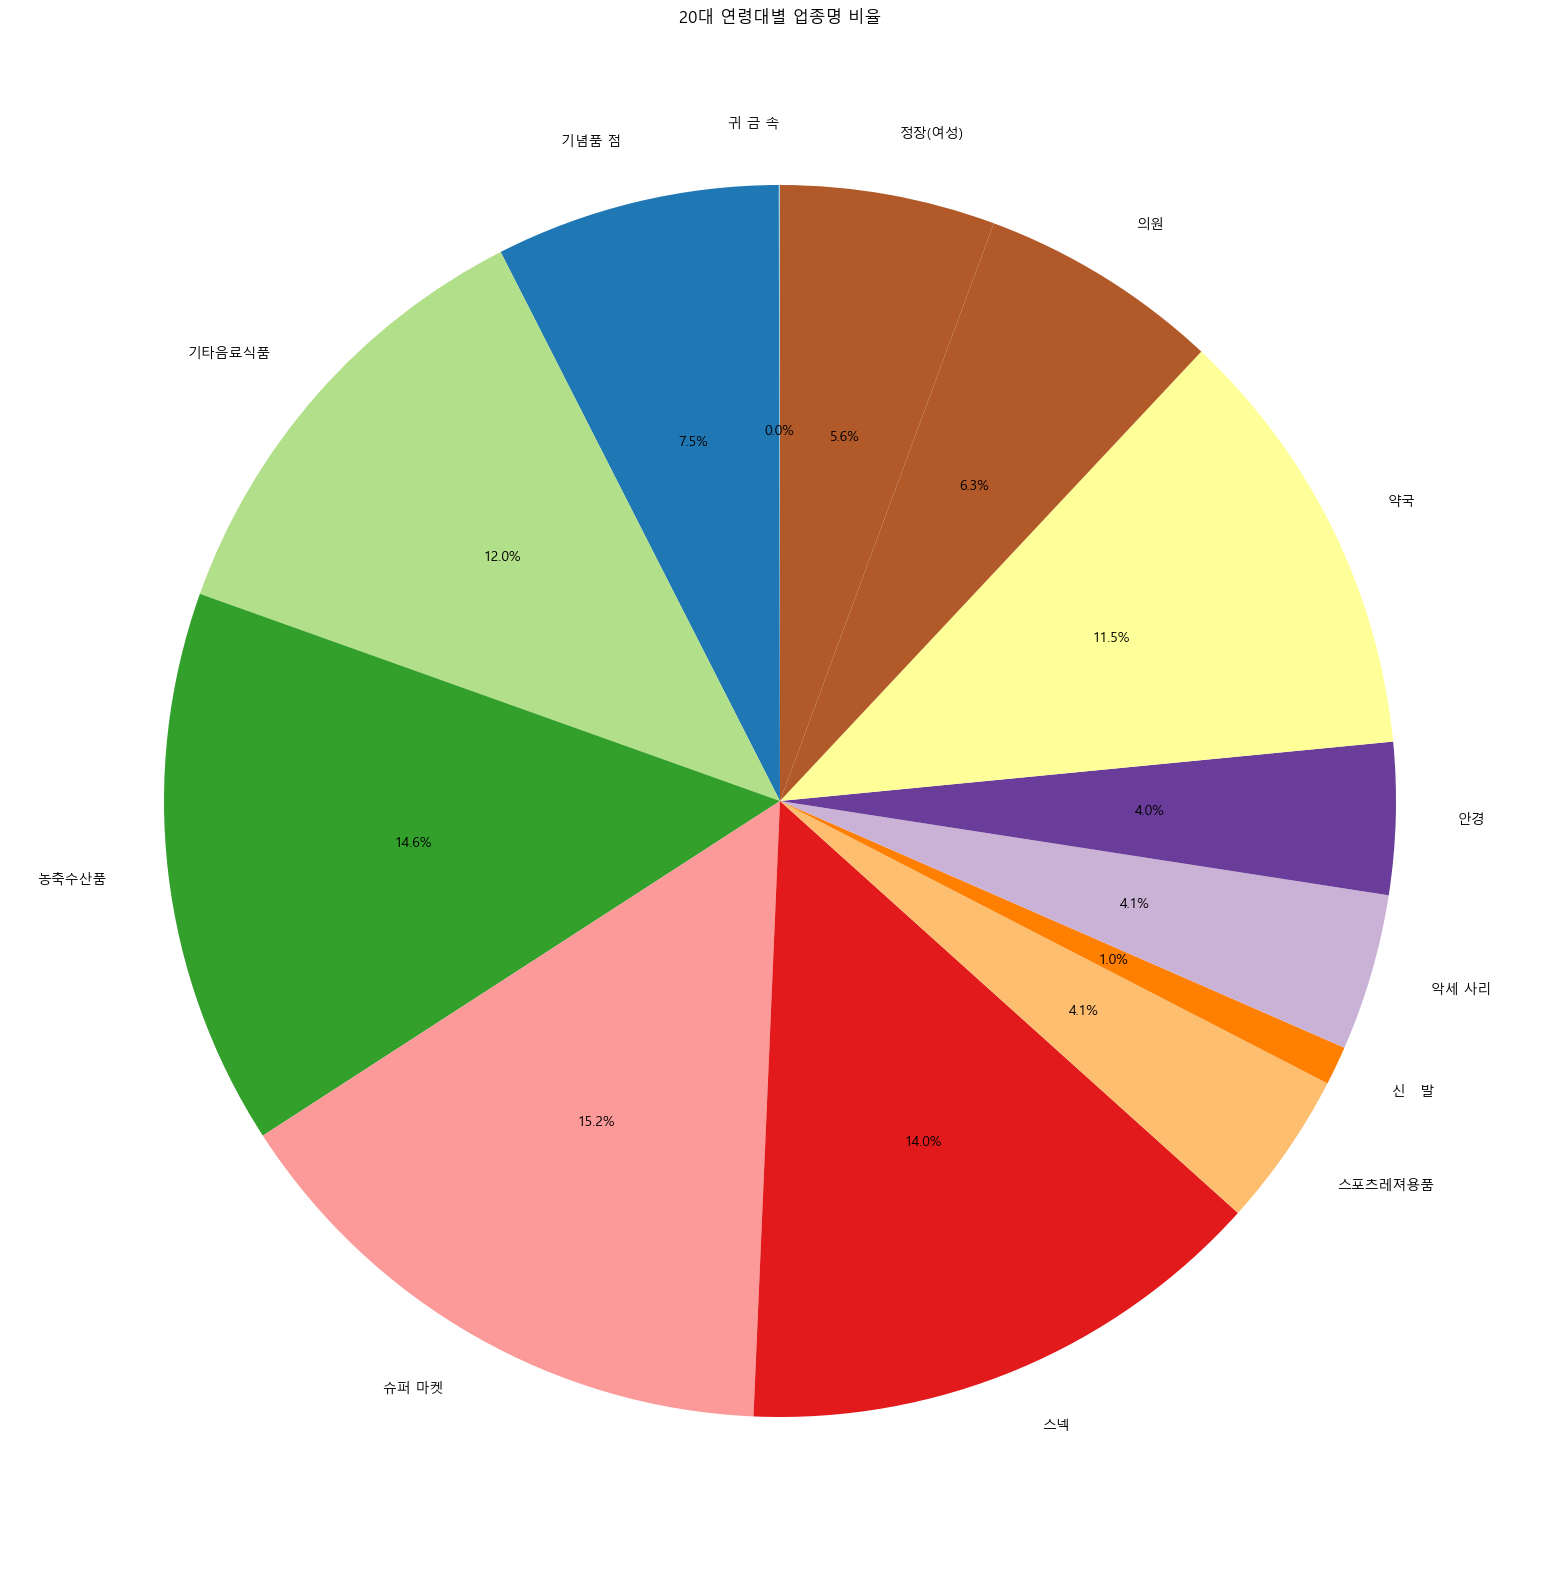

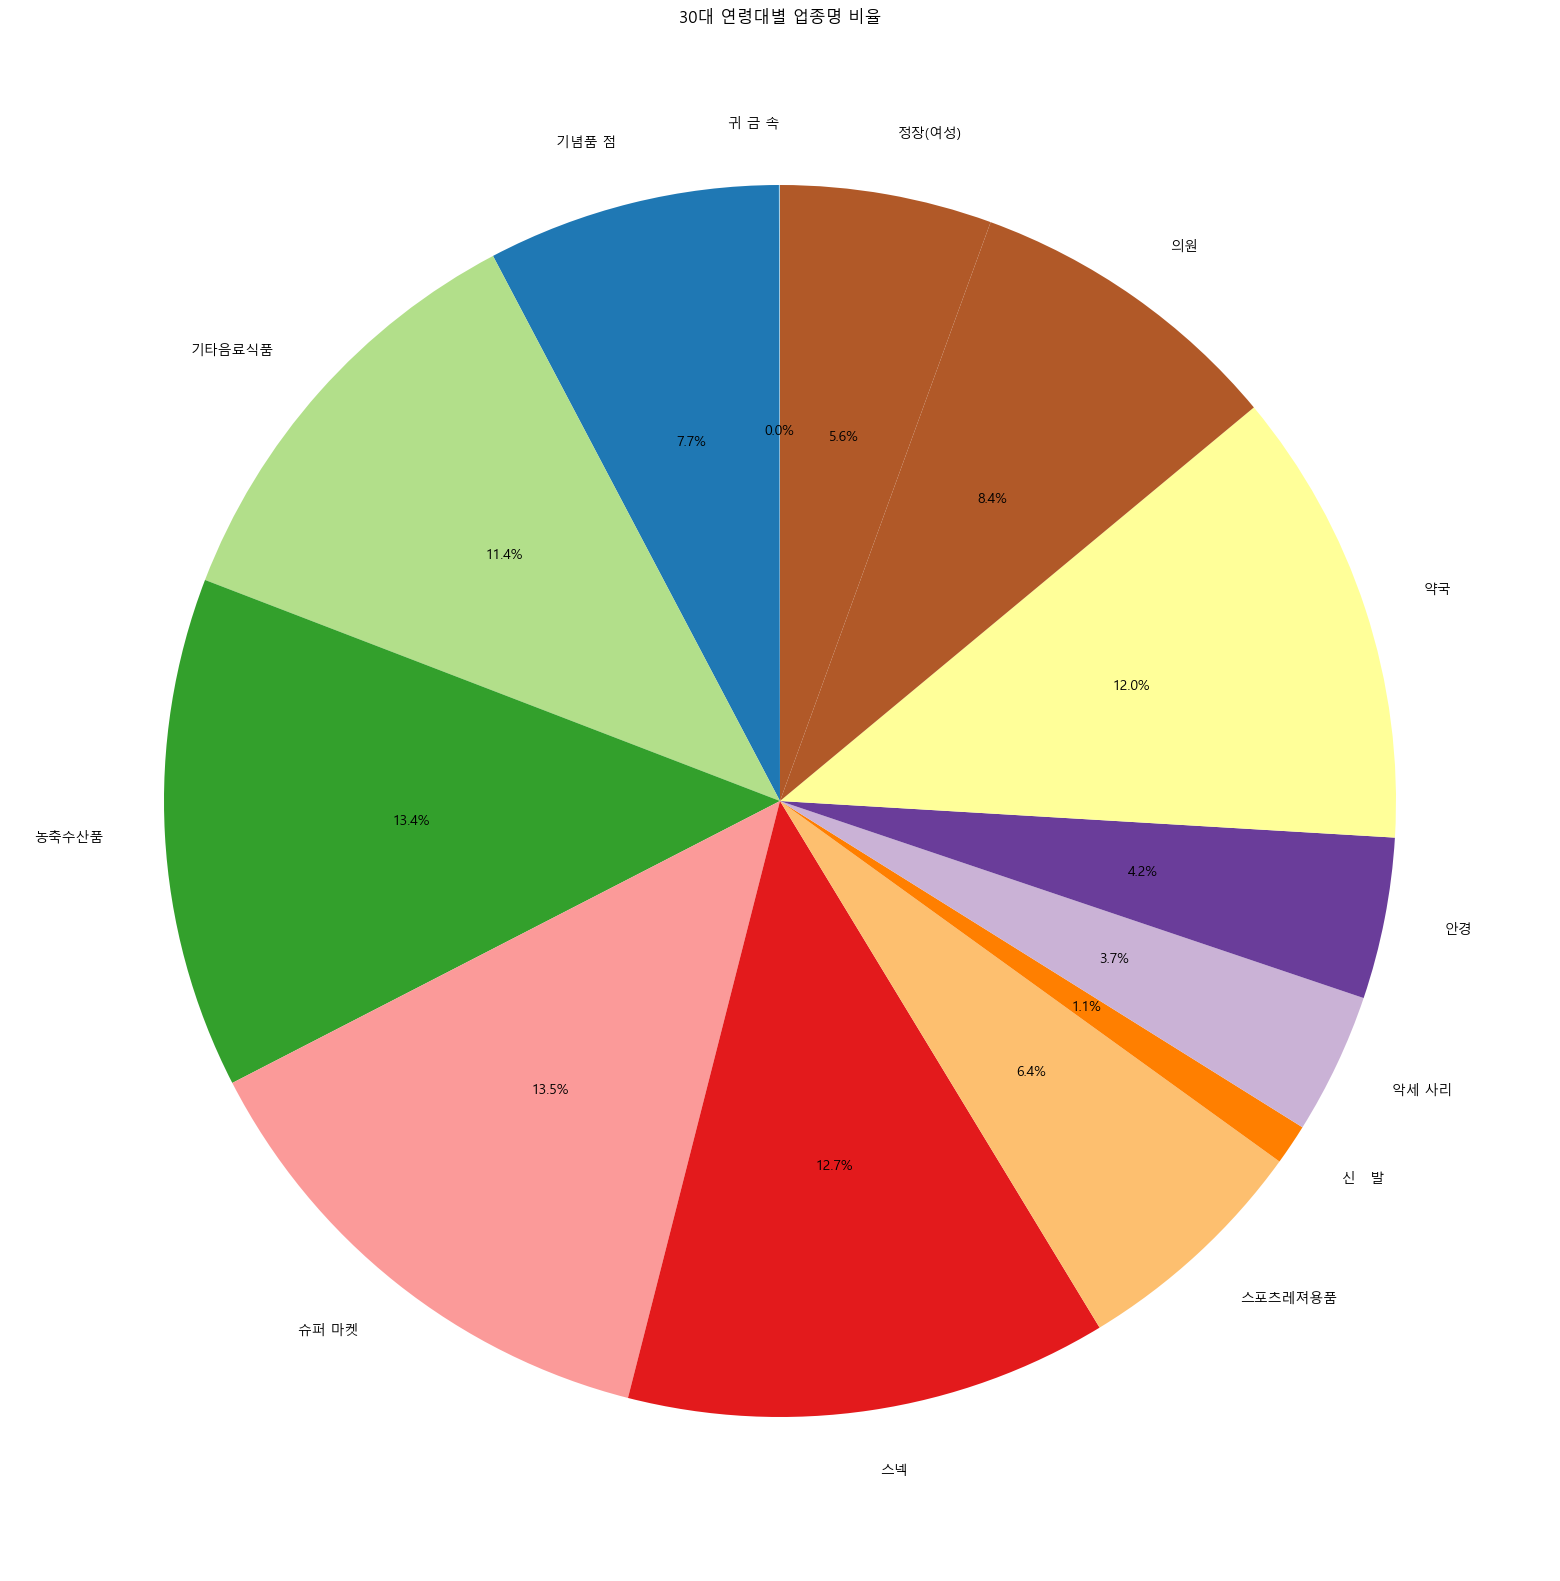

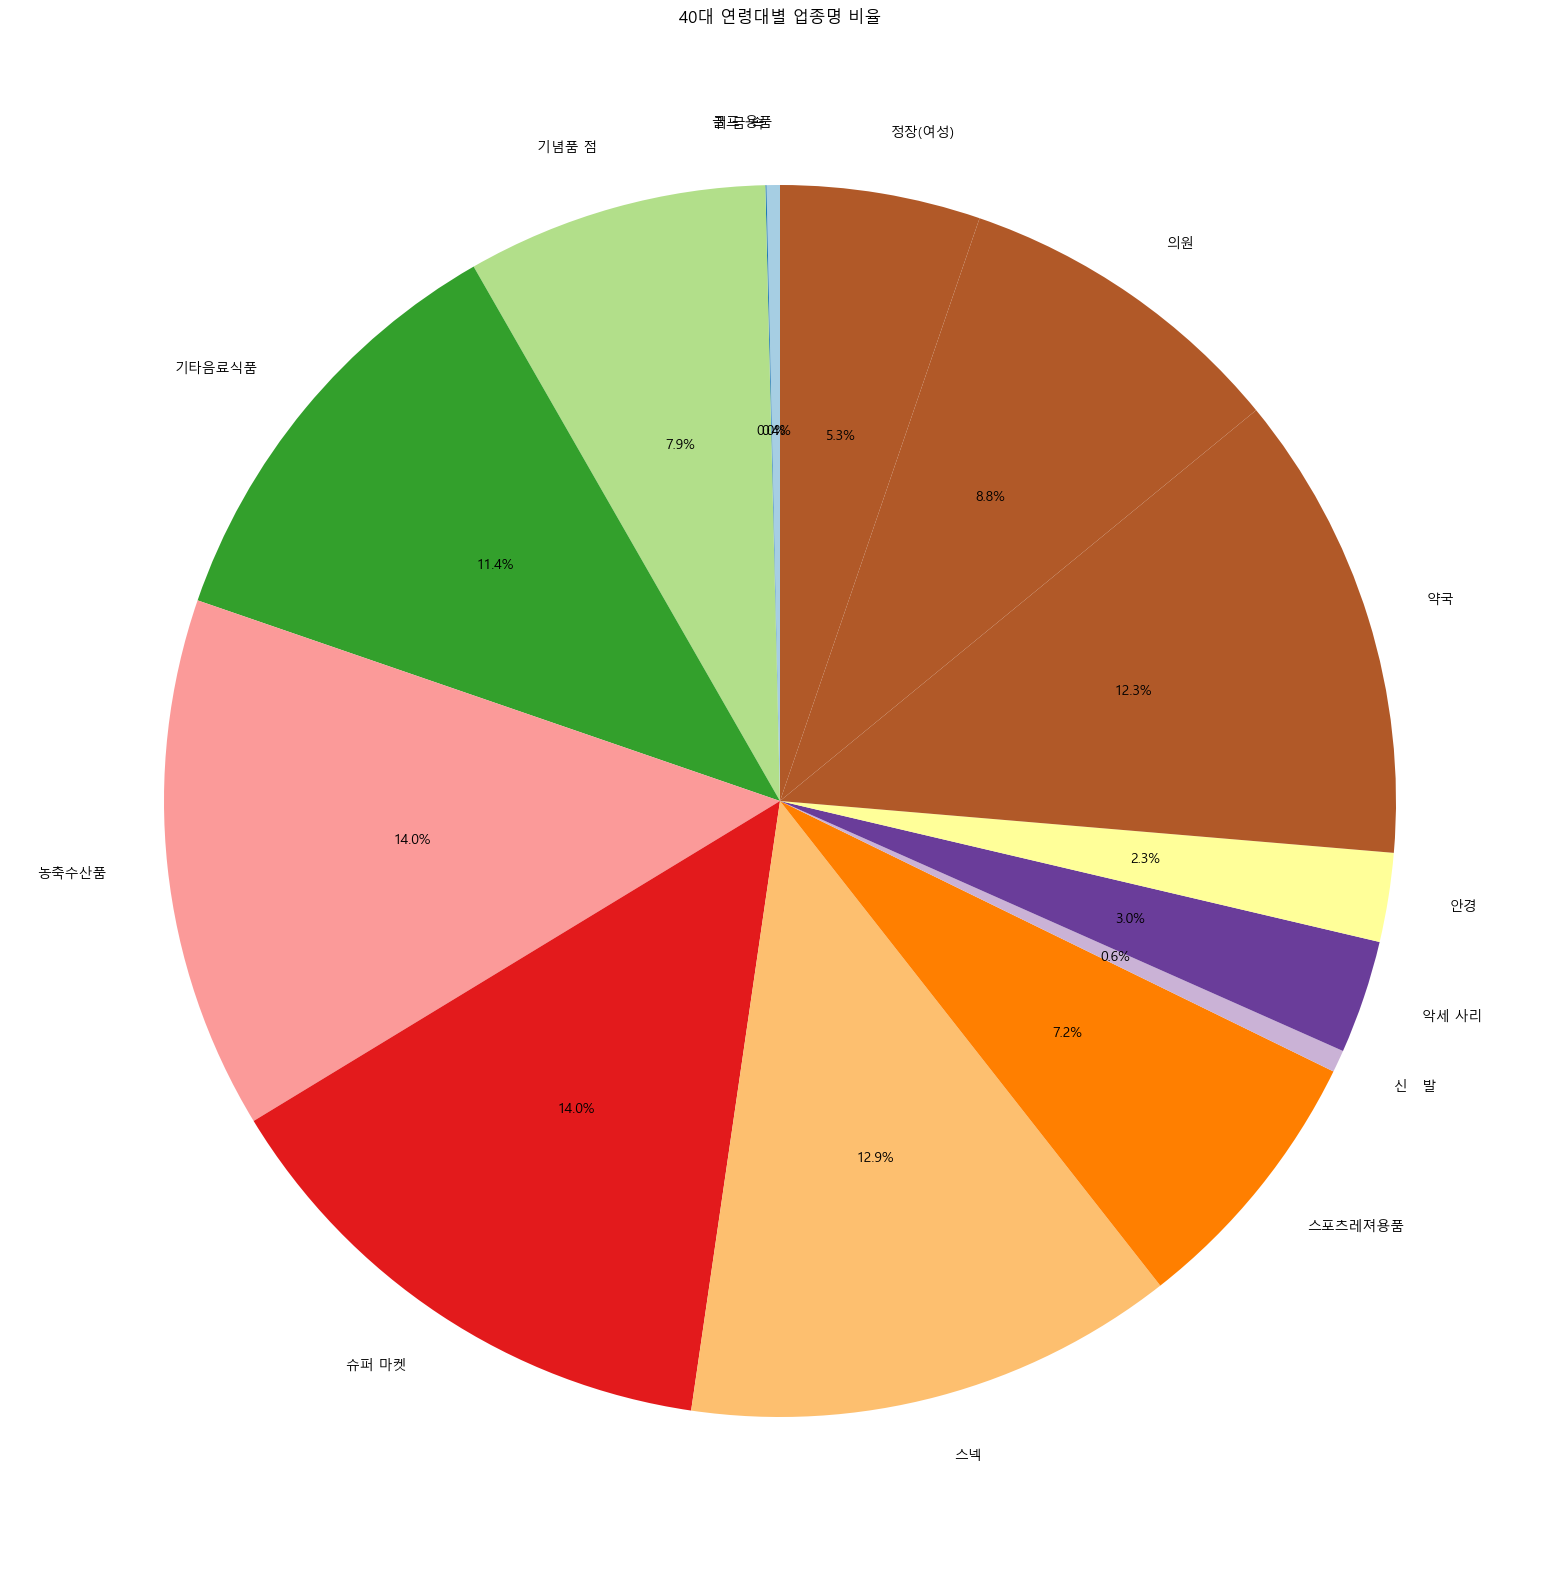

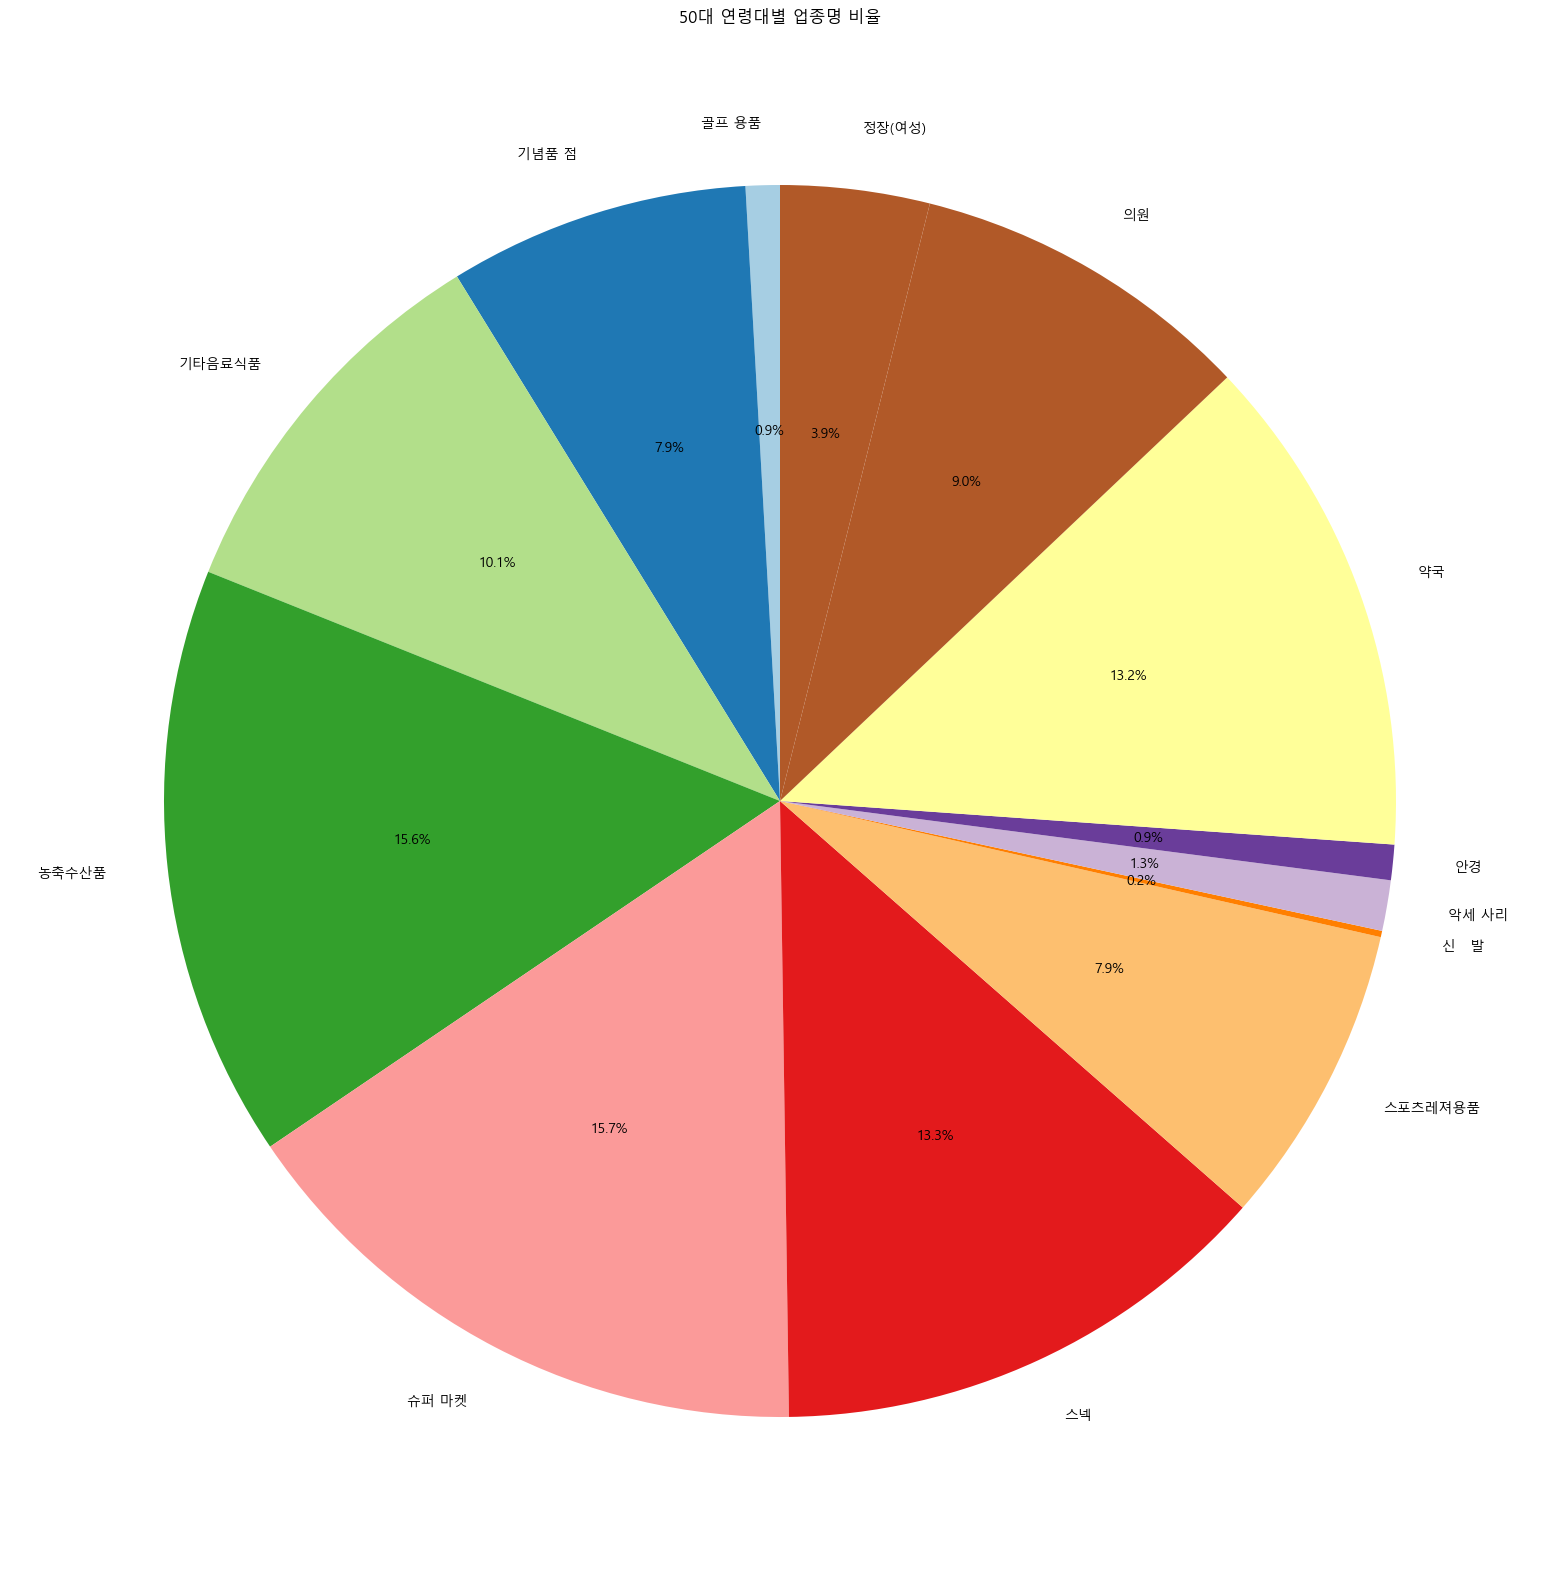

In [19]:
colors = plt.cm.Paired(range(len(df['업종명'].unique())))
for age_group, data in age_type.groupby('연령대별'):
    plt.figure(figsize=(20, 20))
    plt.pie(data['count'], labels=data['업종명'], autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(f'{age_group} 연령대별 업종명 비율')
    plt.show()

- 대부분의 연려ㅐ가 농축수산품과 슈퍼마켓 이용을 자주한다

In [20]:
age_jeju=df.groupby(['연령대별'])['제주 중분류'].value_counts().reset_index()

c:\Users\eagls\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2500x2500 with 0 Axes>

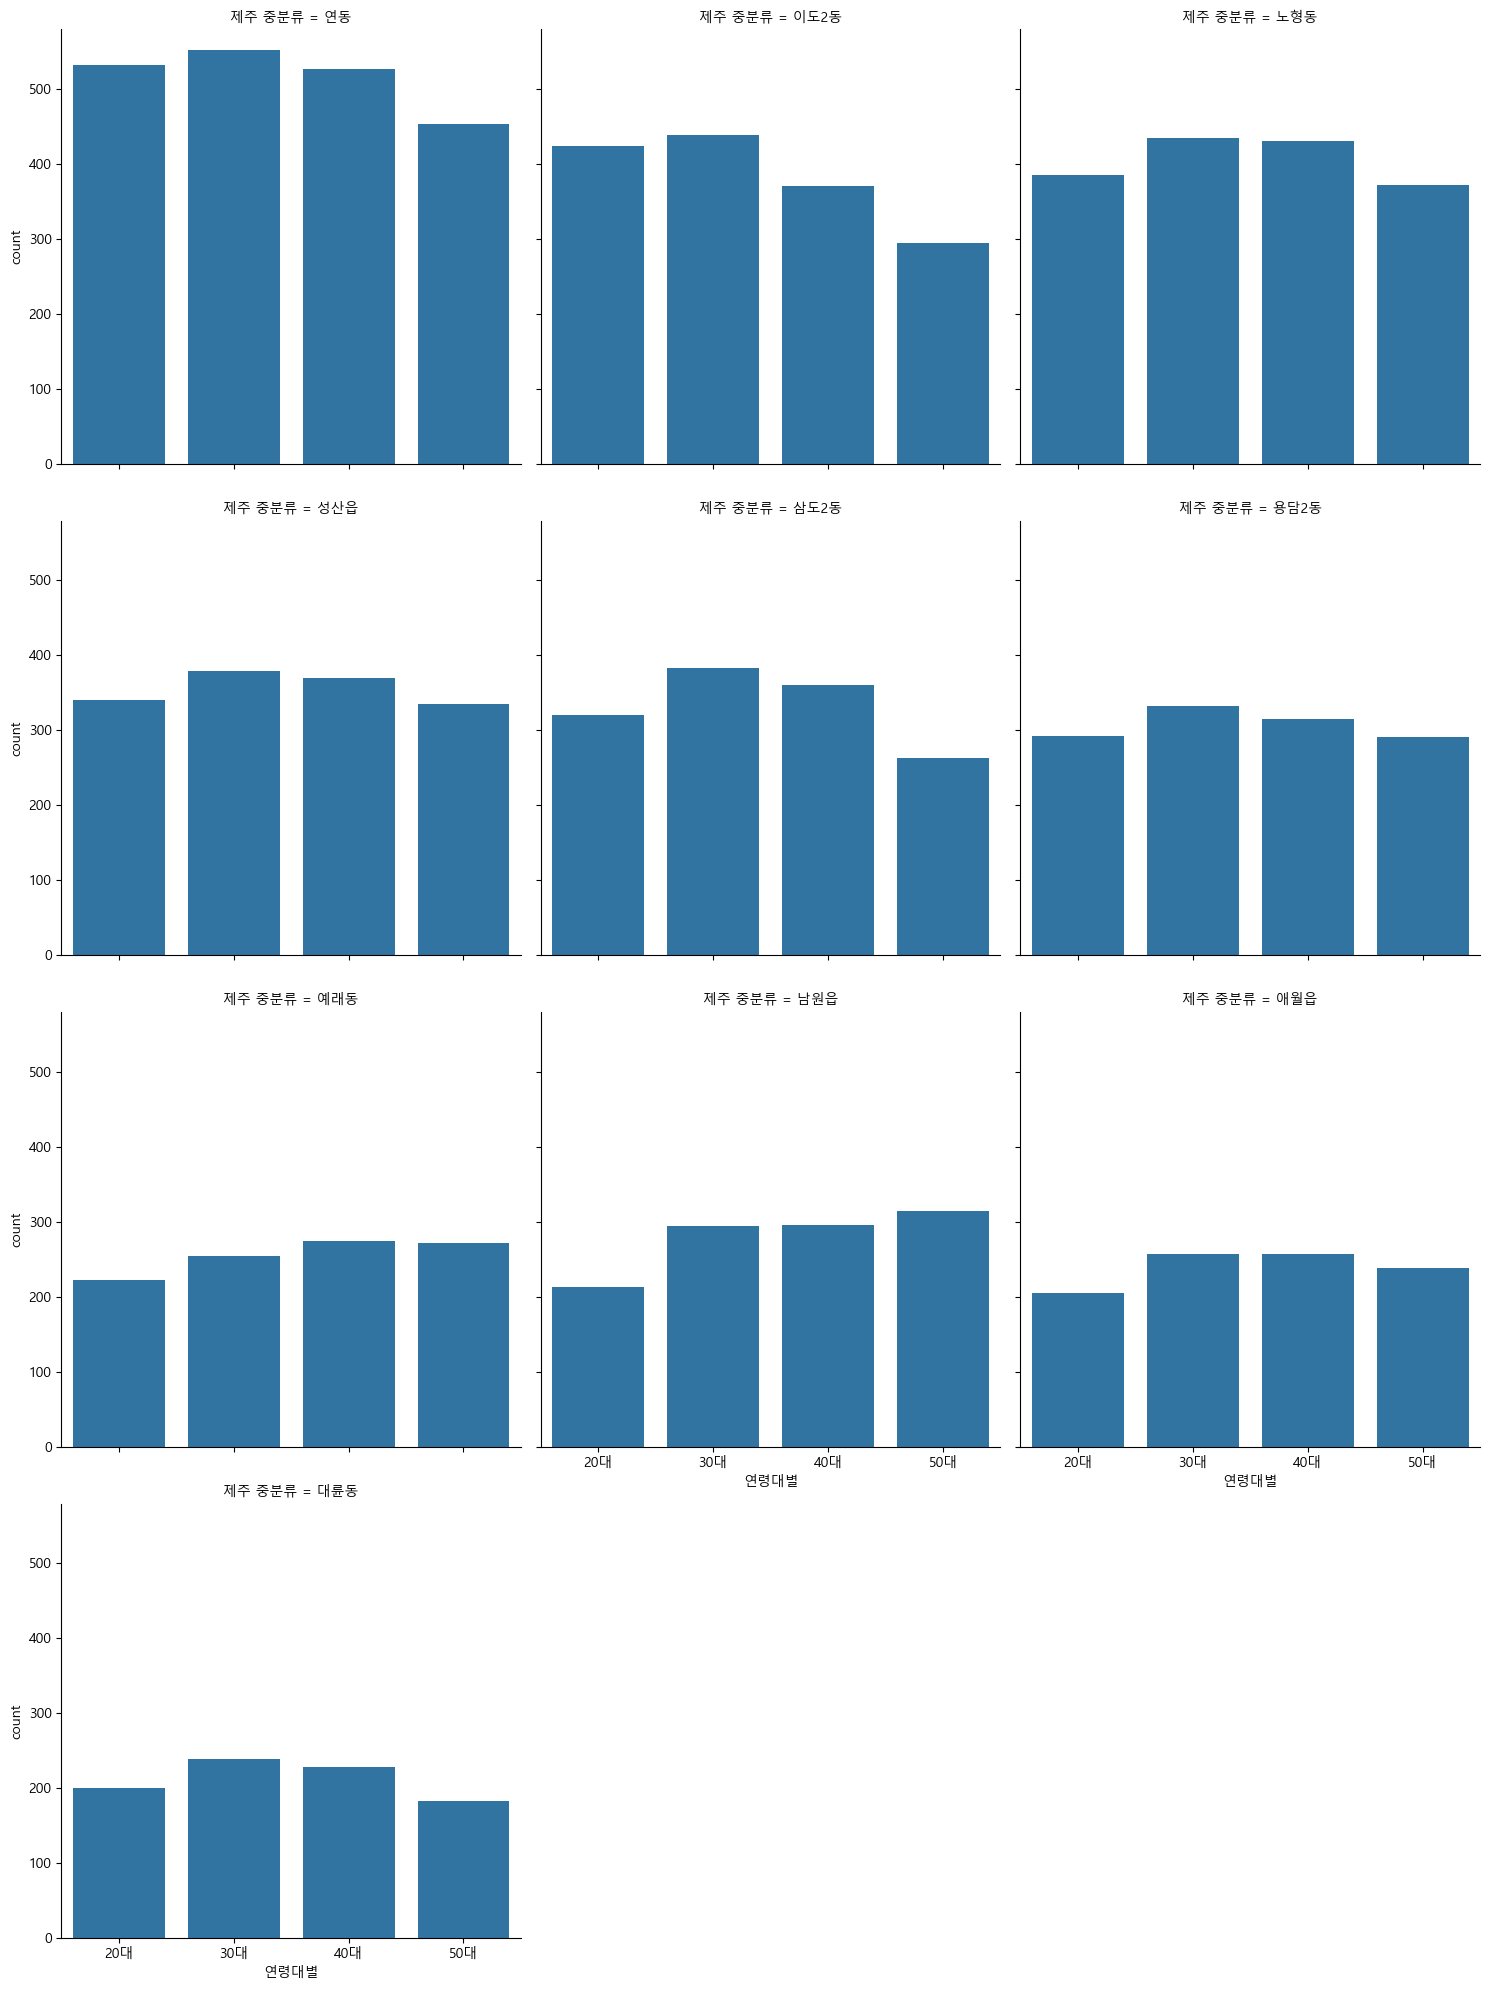

In [21]:
plt.figure(figsize=(25, 25))
g = sns.FacetGrid(age_jeju, col="제주 중분류", col_wrap=3, height=5)
g.map(sns.barplot, '연령대별', 'count', errorbar=None)
plt.show()

- 연동에 관광객이 많이 방문한다

In [22]:
gender_jeju=df.groupby(['성별'])['제주 중분류'].value_counts().reset_index()

c:\Users\eagls\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2500x2500 with 0 Axes>

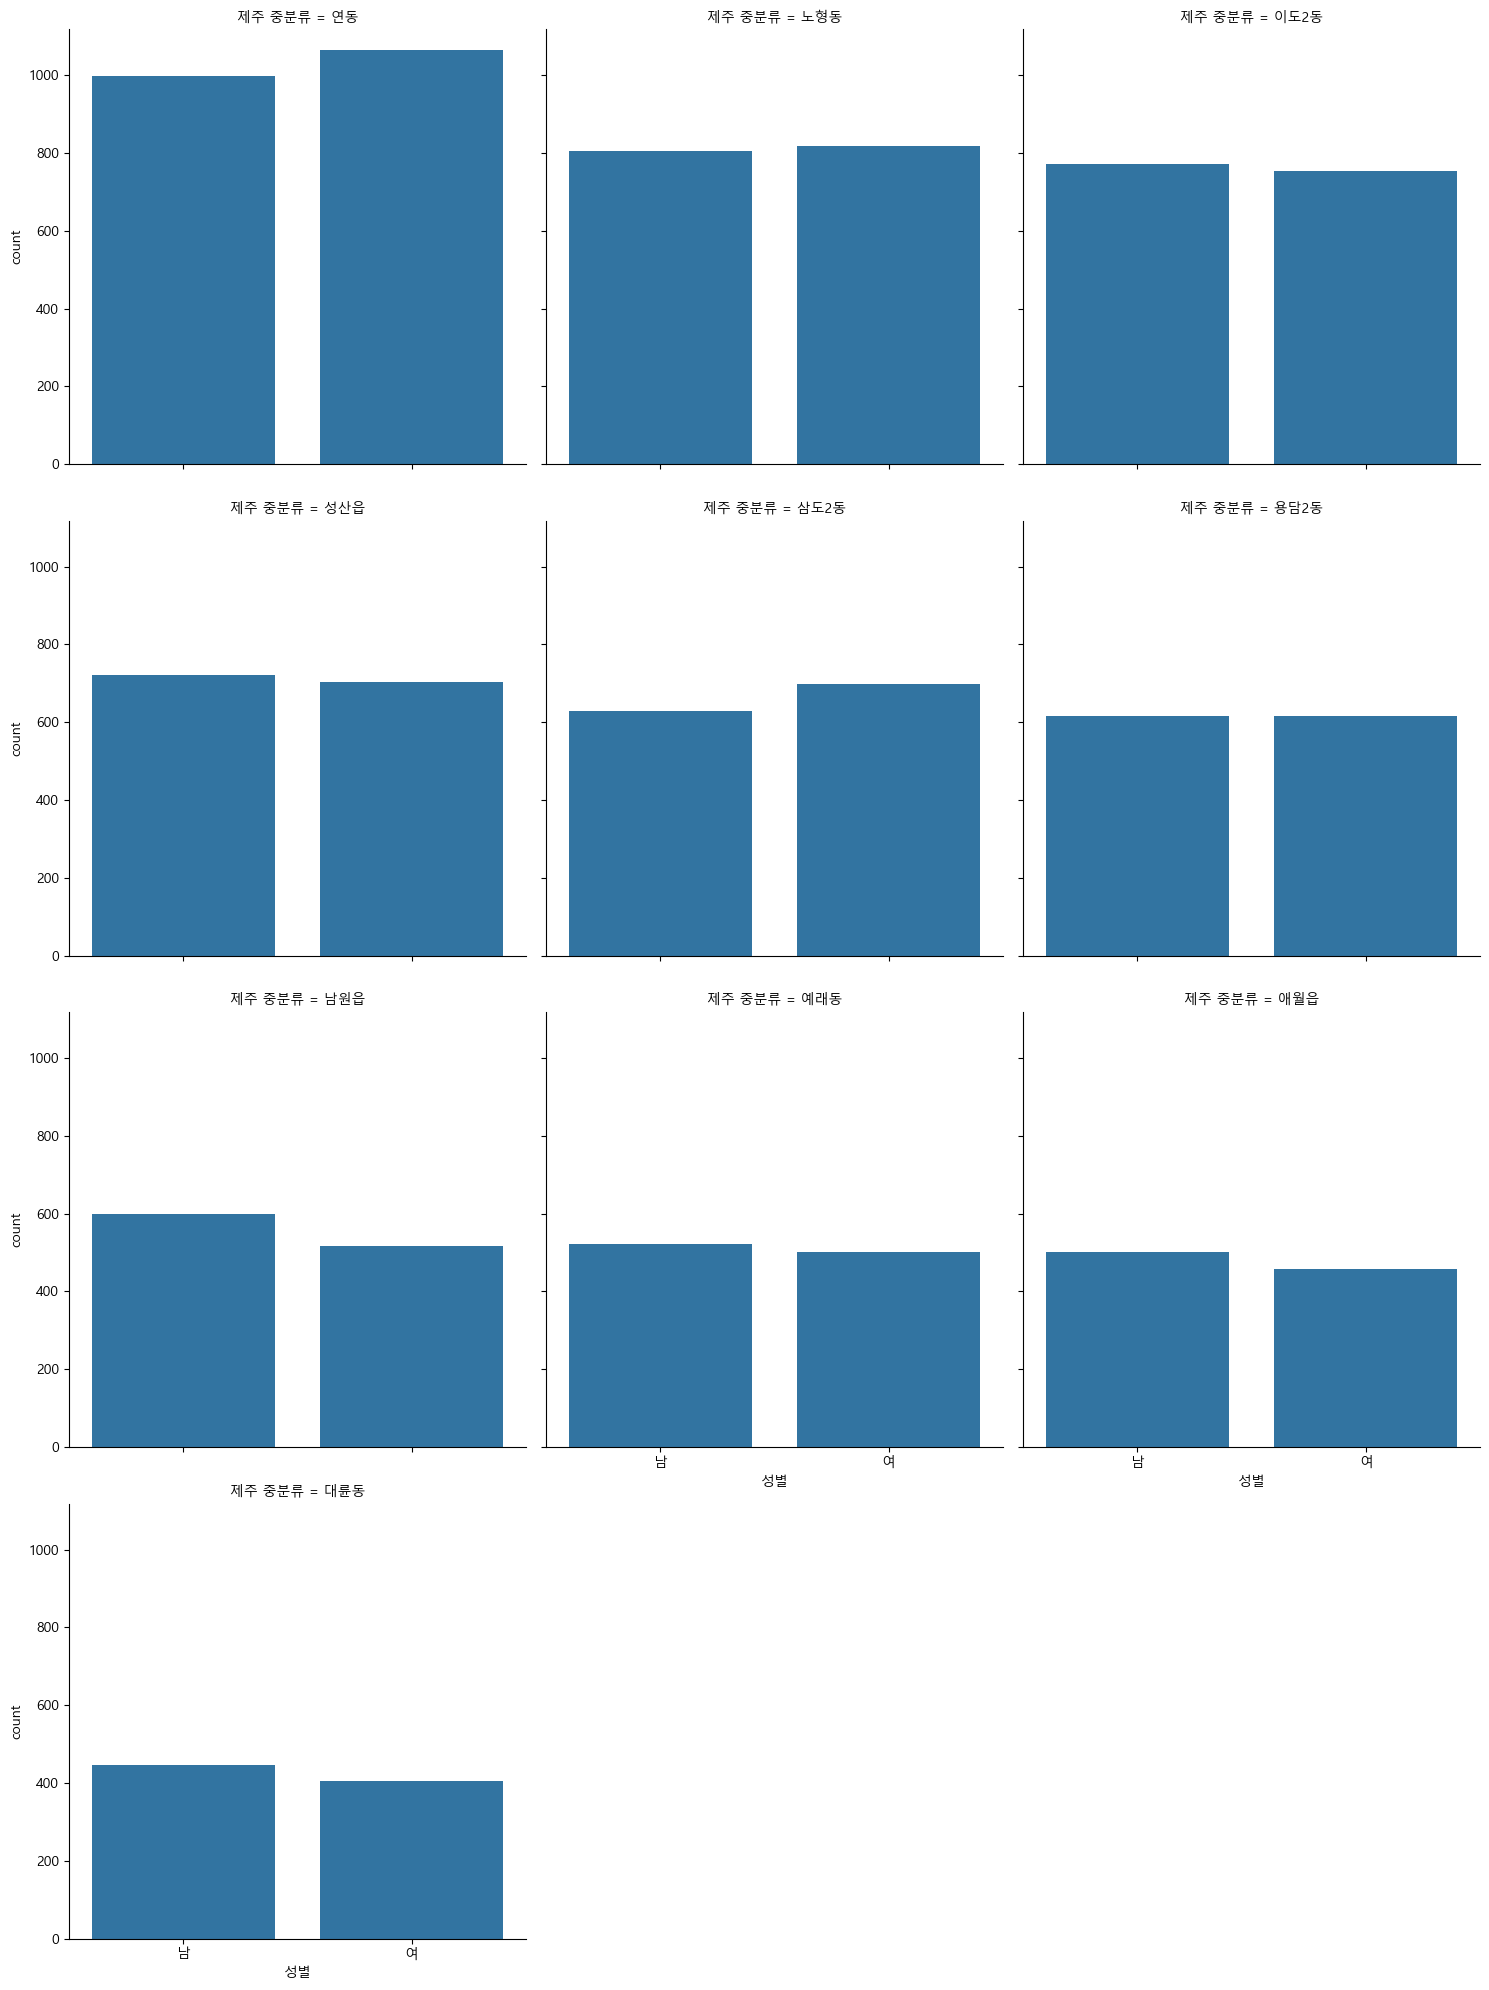

In [23]:
plt.figure(figsize=(25, 25))
g = sns.FacetGrid(gender_jeju, col="제주 중분류", col_wrap=3, height=5)
g.map(sns.barplot, '성별', 'count', errorbar=None)
plt.show()

- 비율에는 큰 차이가 없지만 연동과 삼도2동에는 여자가 많고 남원읍과 대륜동은 남성의 방문이 조금 더 많다

In [24]:
month_card_use=df.groupby(['월','제주 중분류'])[' 카드이용건수 '].sum().reset_index()

c:\Users\eagls\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2500x2500 with 0 Axes>

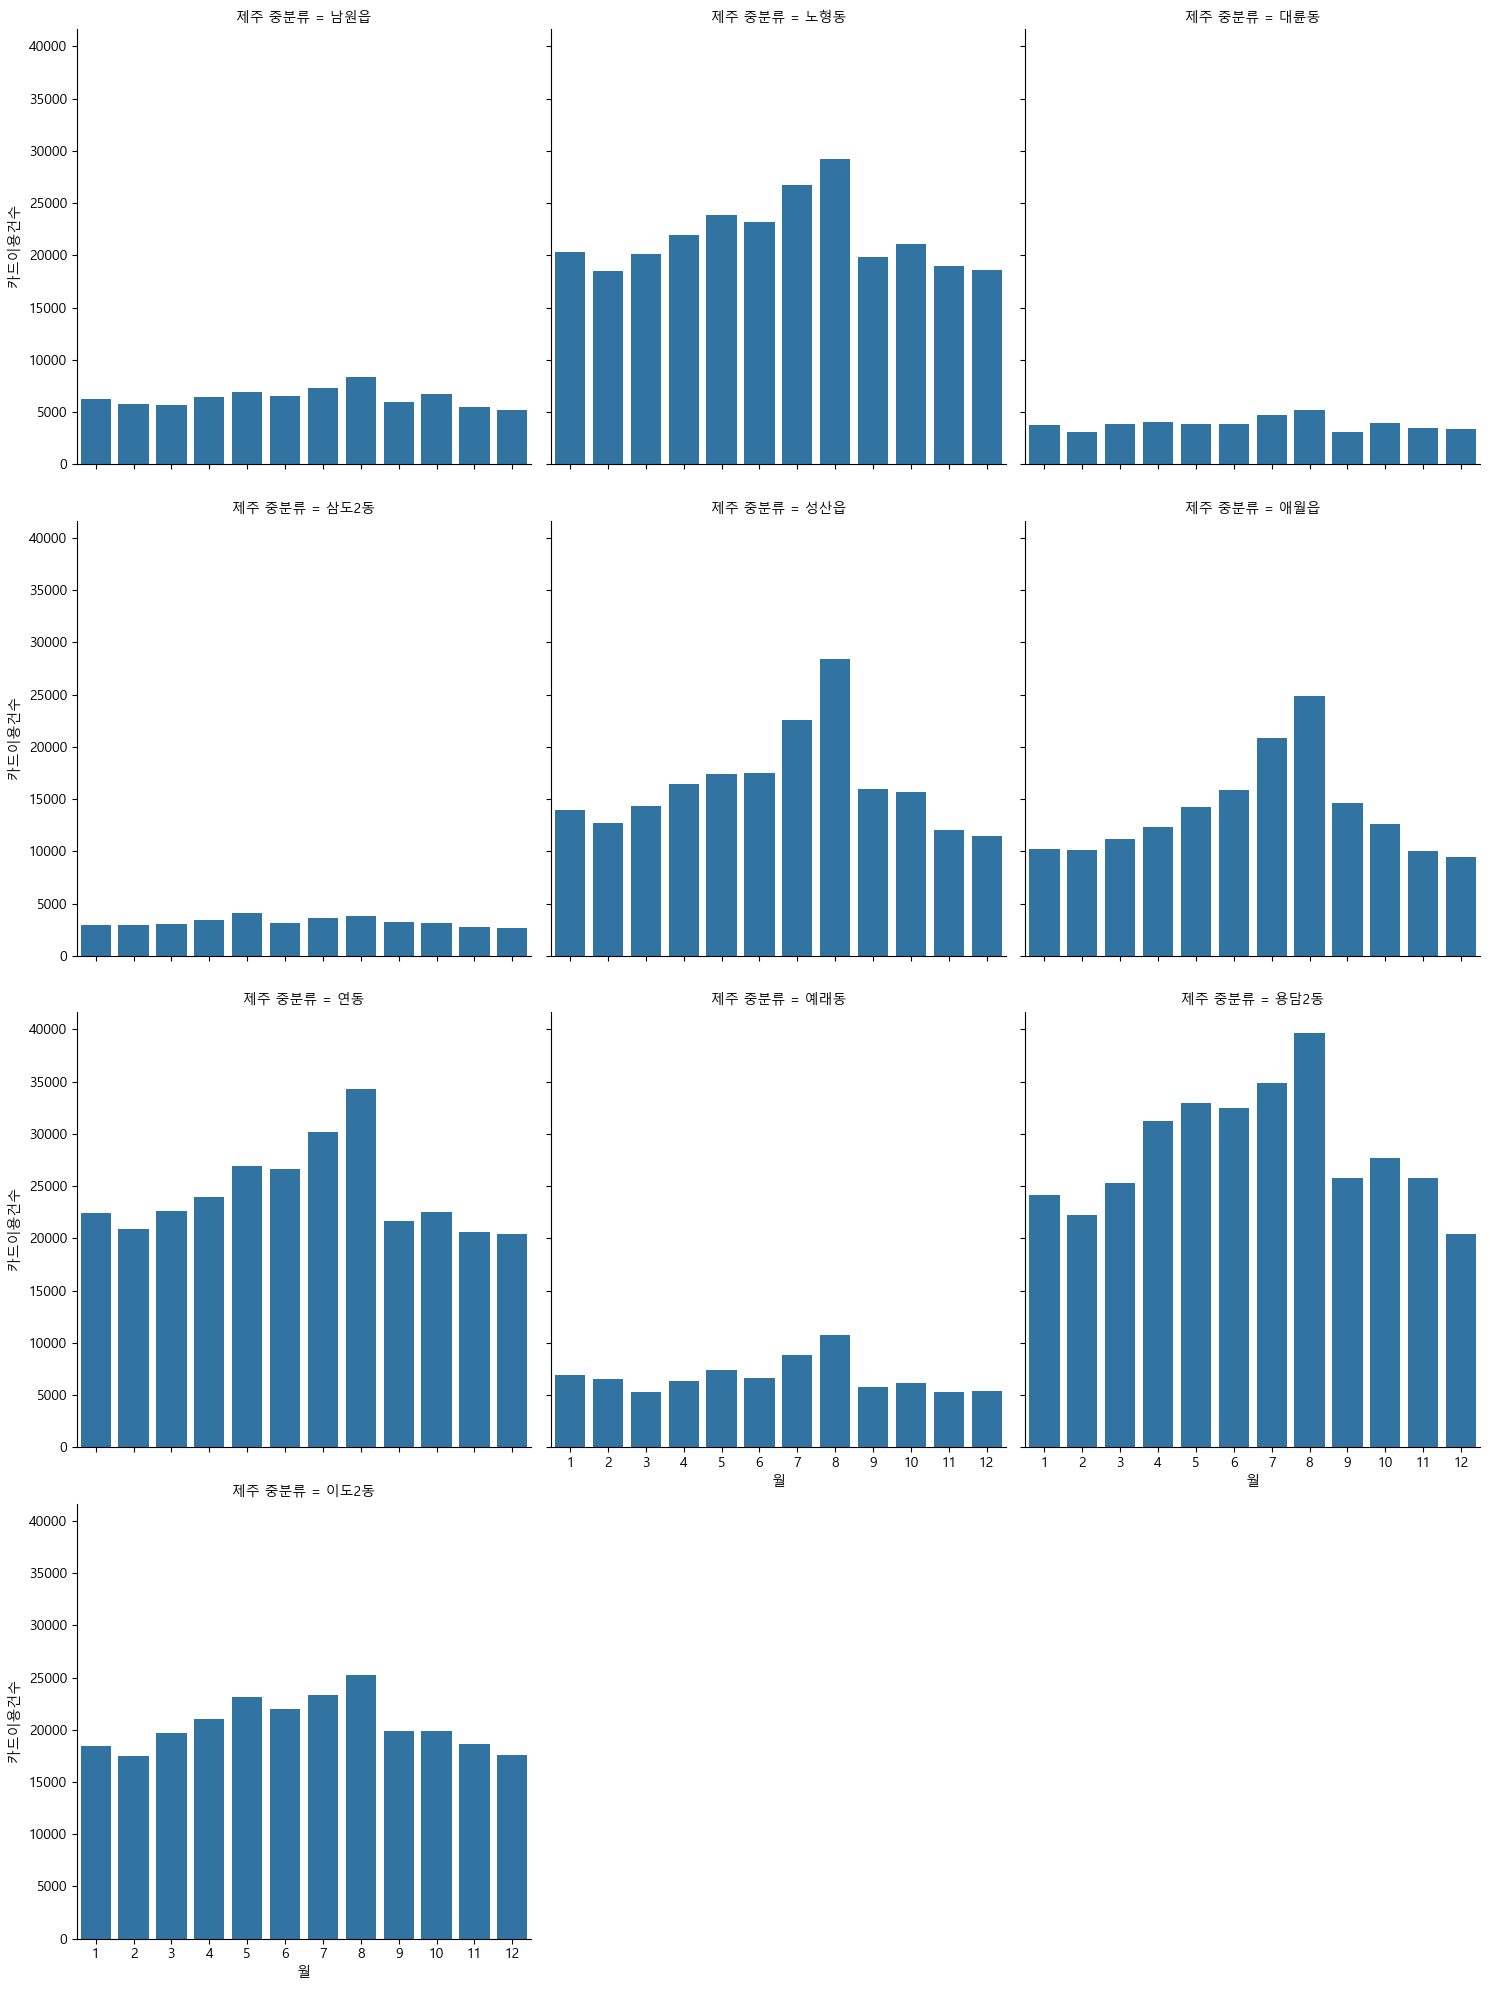

In [25]:
plt.figure(figsize=(25, 25))
g = sns.FacetGrid(month_card_use, col="제주 중분류", col_wrap=3, height=5)
g.map(sns.barplot, '월', ' 카드이용건수 ', errorbar=None)
plt.show()

- 7월 8월에 관광객들이 많아 카드 건수도 7월 8월에 많다

In [26]:
jeju_type_card_use=df.groupby(['제주 중분류','업종명'])[' 카드이용건수 '].sum().reset_index()

c:\Users\eagls\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2500x2500 with 0 Axes>

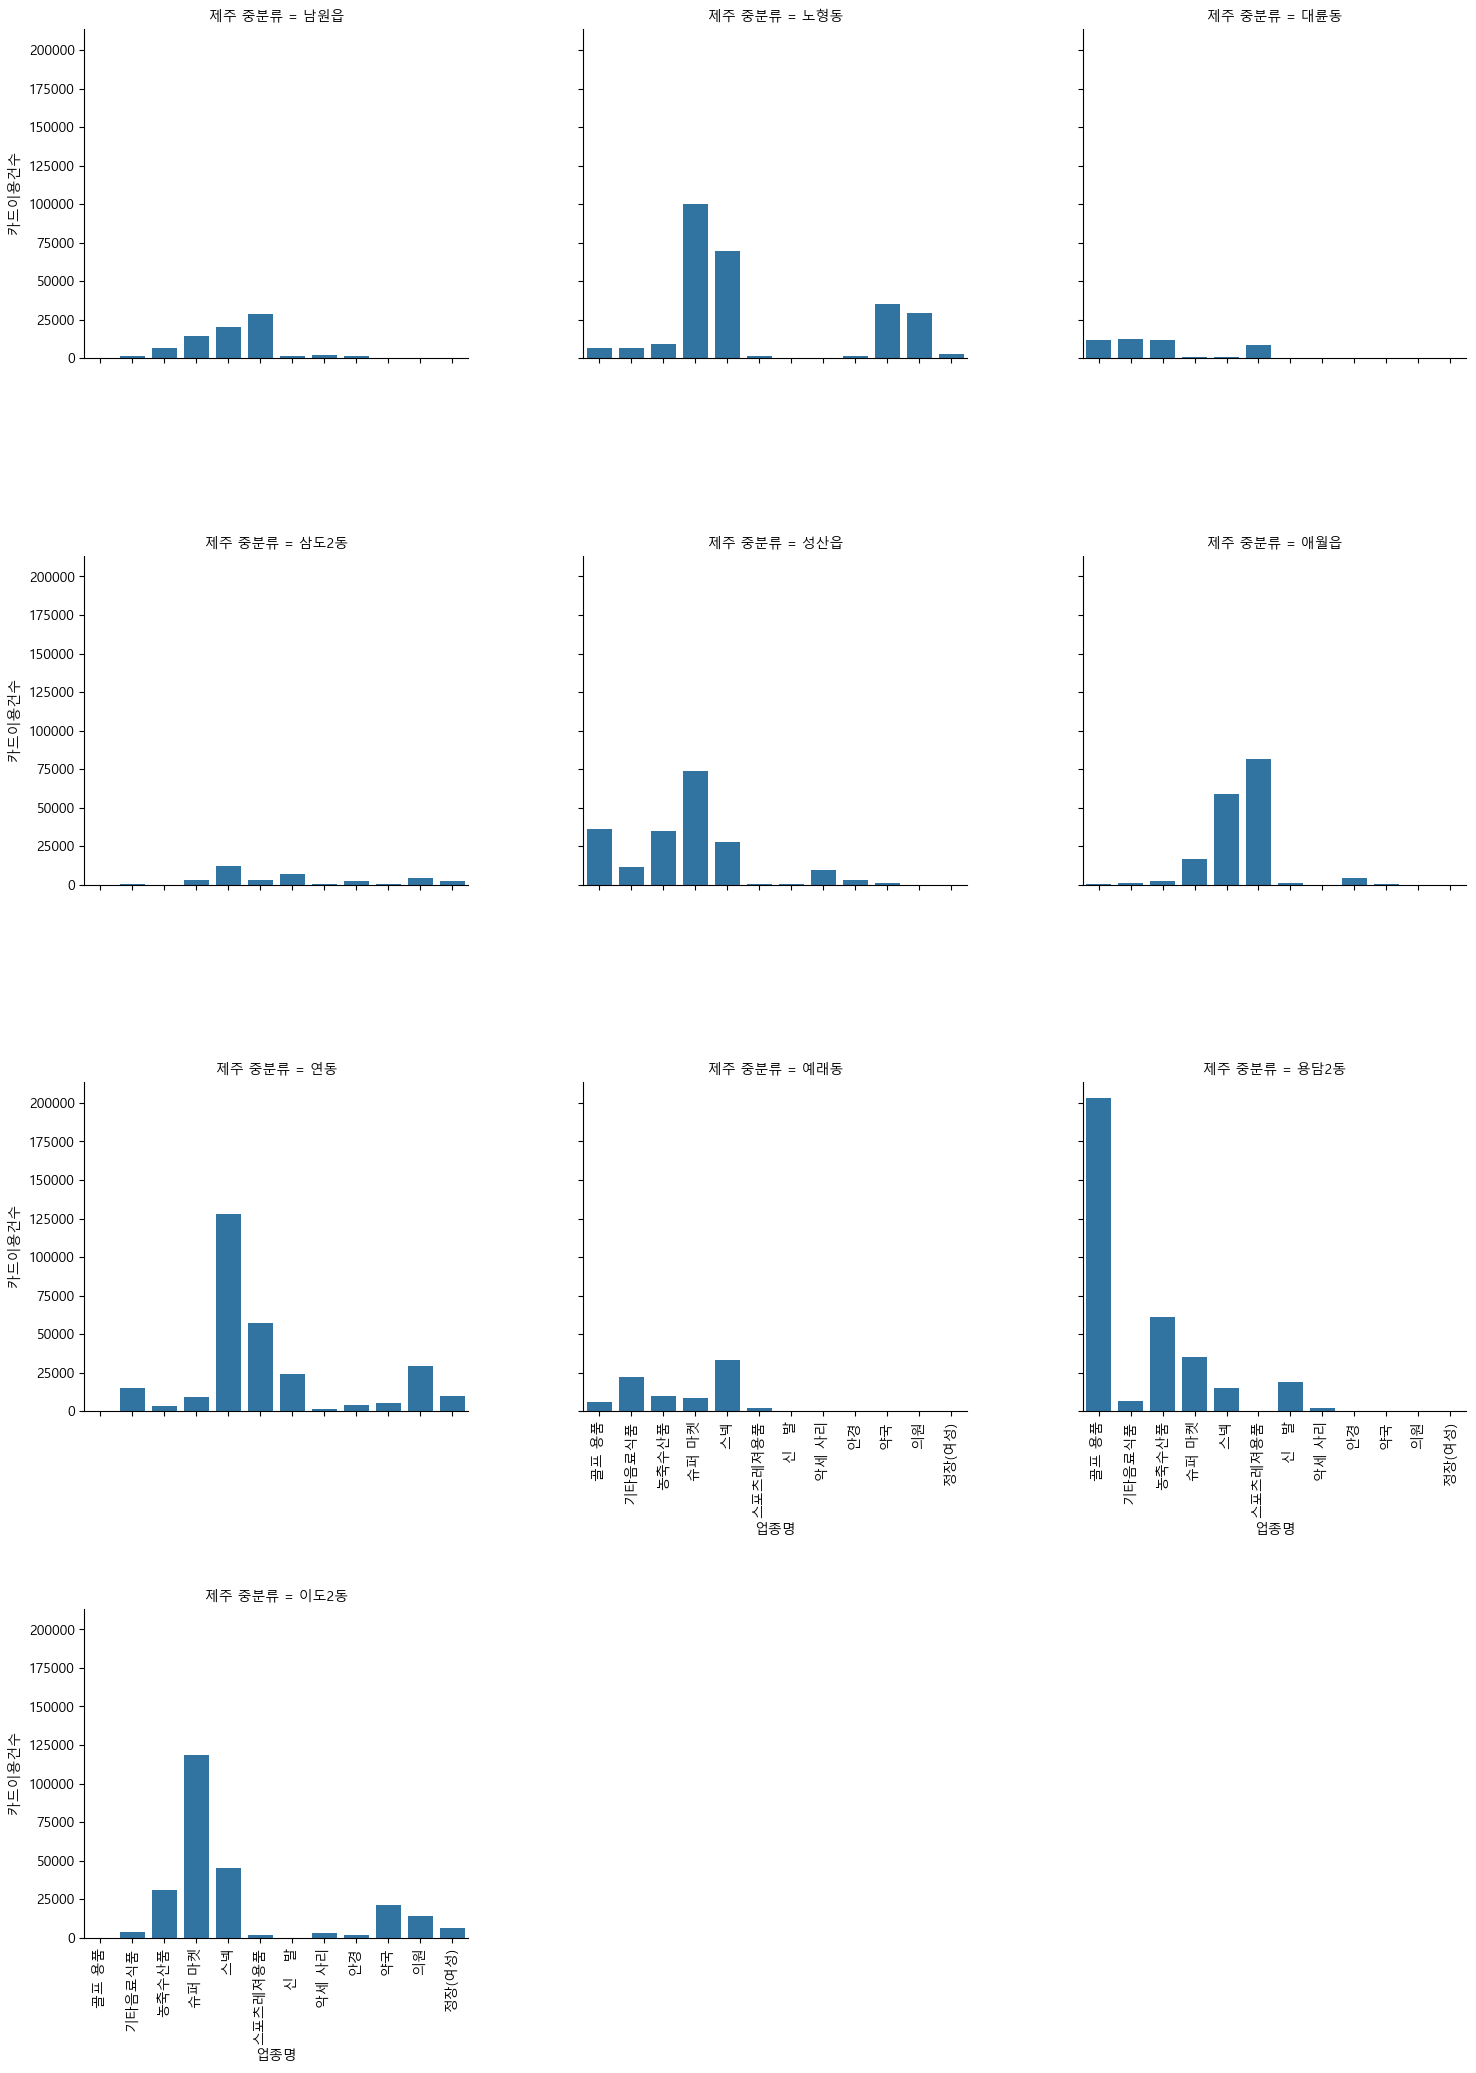

In [27]:
# Assuming 'jeju_type_card_use' is your DataFrame
plt.figure(figsize=(25, 25))
g = sns.FacetGrid(jeju_type_card_use, col="제주 중분류", col_wrap=3, height=5)
g.map(sns.barplot, '업종명', ' 카드이용건수 ')

# Adjust x-axis label rotation for each subplot
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=90)

plt.subplots_adjust(wspace=0.3, hspace=0.6)
plt.show()

- 대부분 슈퍼마켓에 이용이 많은데 용담2동만 골프용품에 대한 카드건수가 많다

In [48]:
jeju_type_use=df.groupby(['성별','제주 중분류','업종명'])[' 카드이용금액 '].sum().reset_index()

c:\Users\eagls\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\eagls\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2500x2500 with 0 Axes>

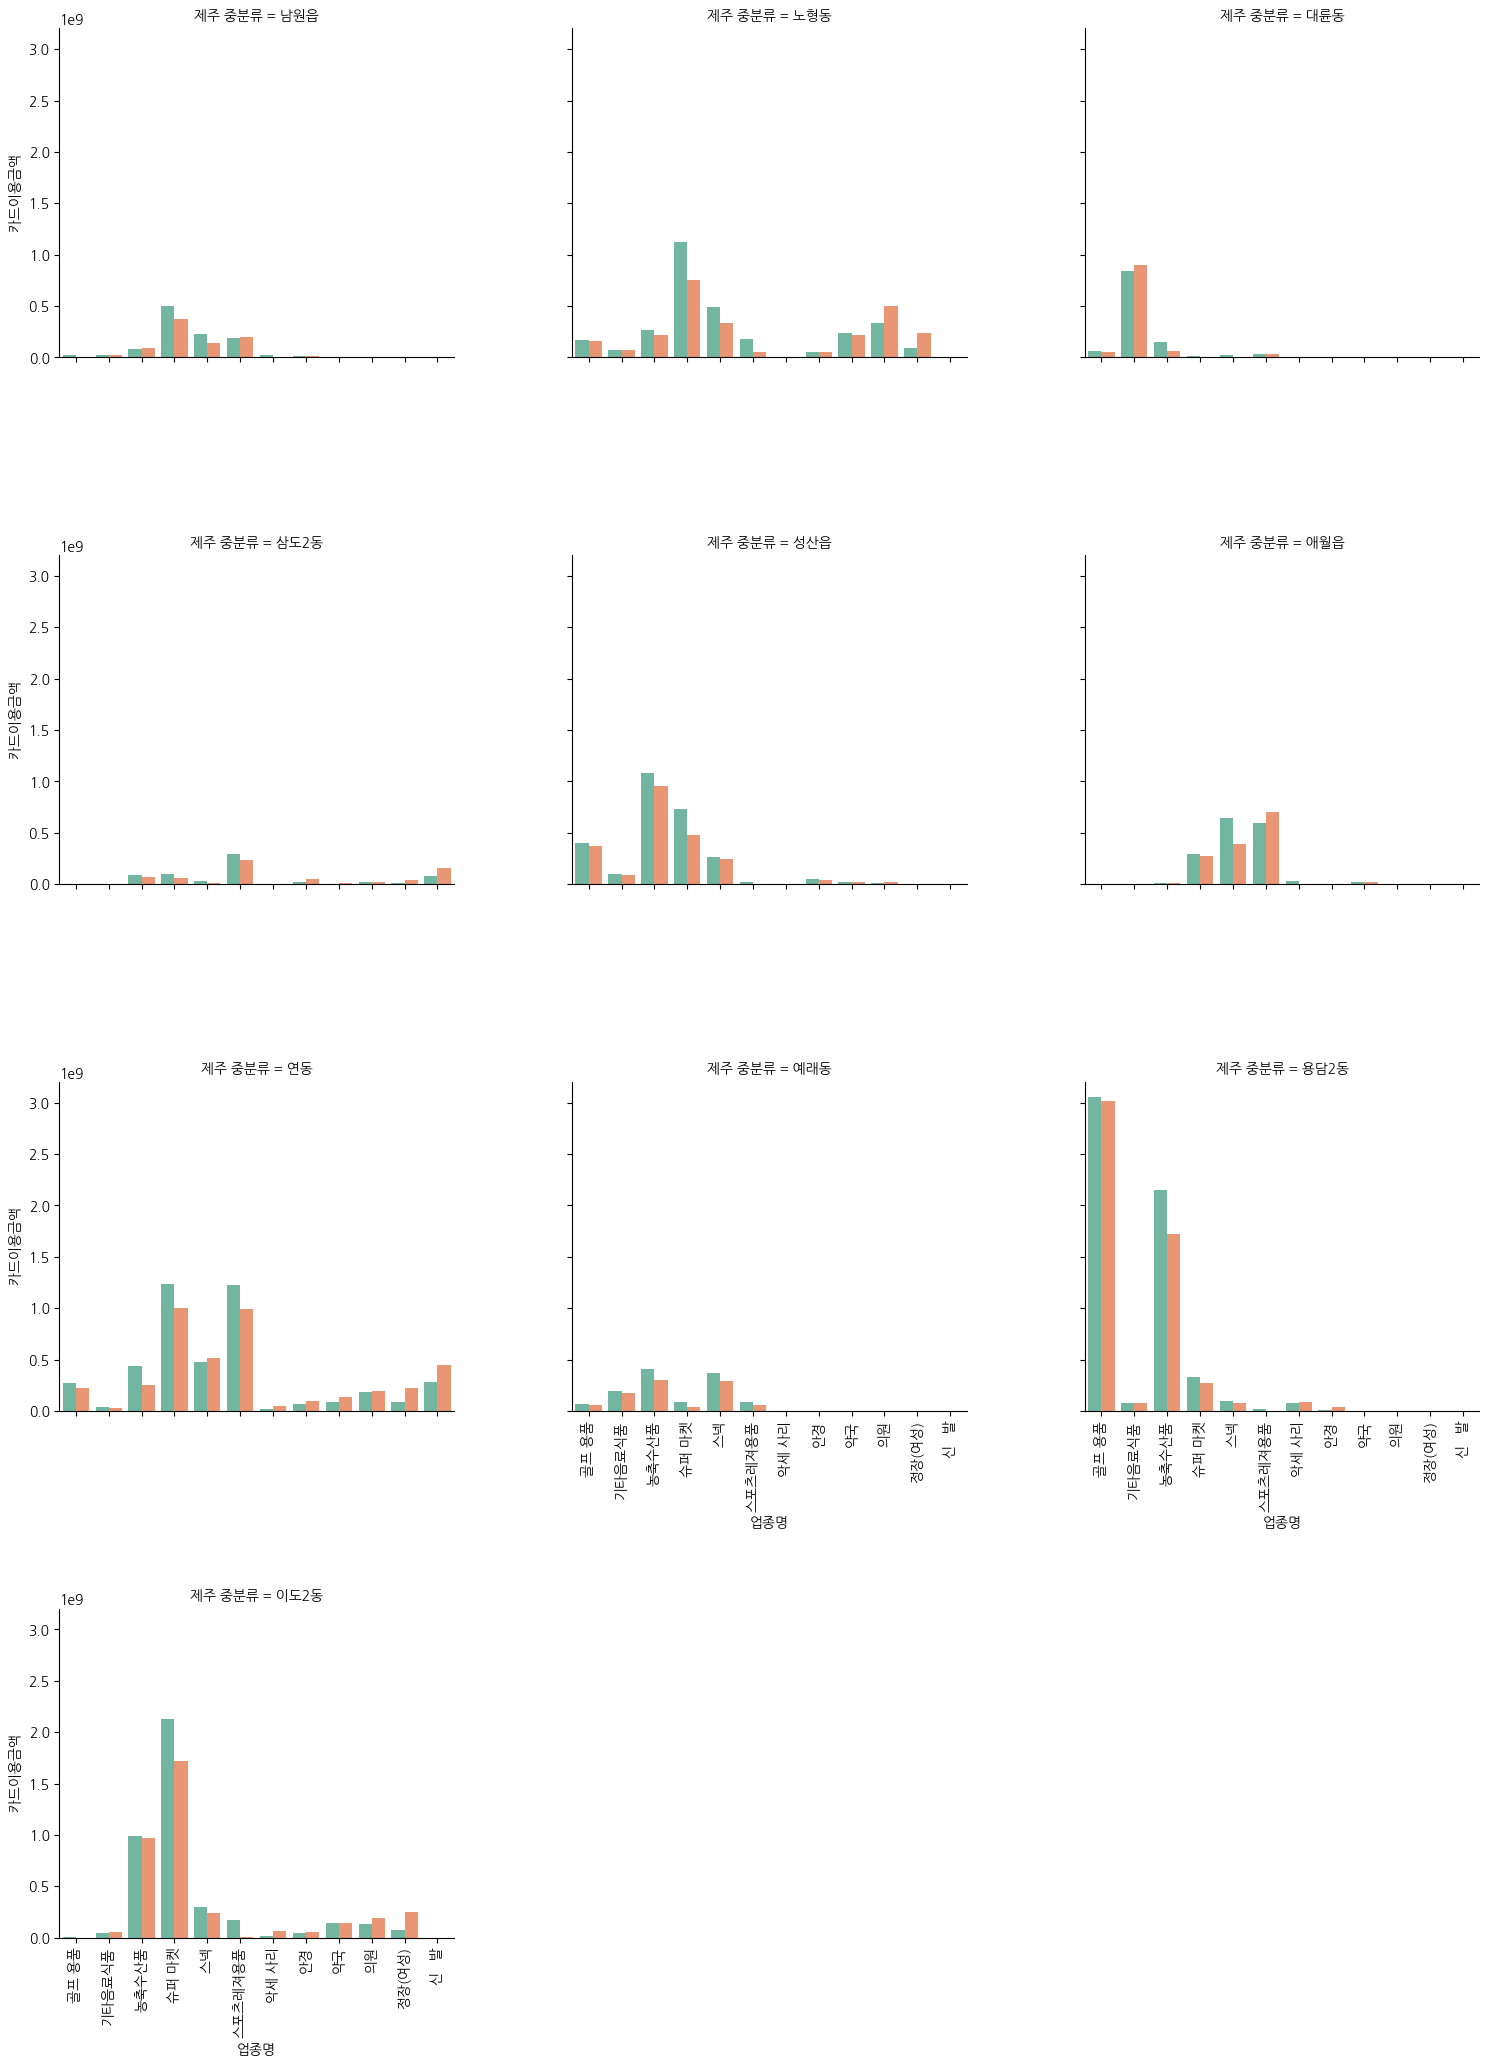

In [51]:
plt.figure(figsize=(25, 25))
g = sns.FacetGrid(jeju_type_use, col="제주 중분류", col_wrap=3, height=5)
g.map(sns.barplot, '업종명', ' 카드이용금액 ','성별',palette='Set2')

# Adjust x-axis label rotation for each subplot
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=90)

plt.subplots_adjust(wspace=0.3, hspace=0.6)
plt.show()

- 용담2동에서 골프용품에 대한 구매가 많아 가격도 제일 높다
- 용담2동에서 농수산식품이 높은이유는 제주공항에서 떠나기전에 사는것 때문이라고 예측한다.

In [52]:
jeju_generation_use=df.groupby(['연령대별','제주 중분류','업종명'])[' 카드이용금액 '].sum().reset_index()

c:\Users\eagls\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\eagls\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2500x2500 with 0 Axes>

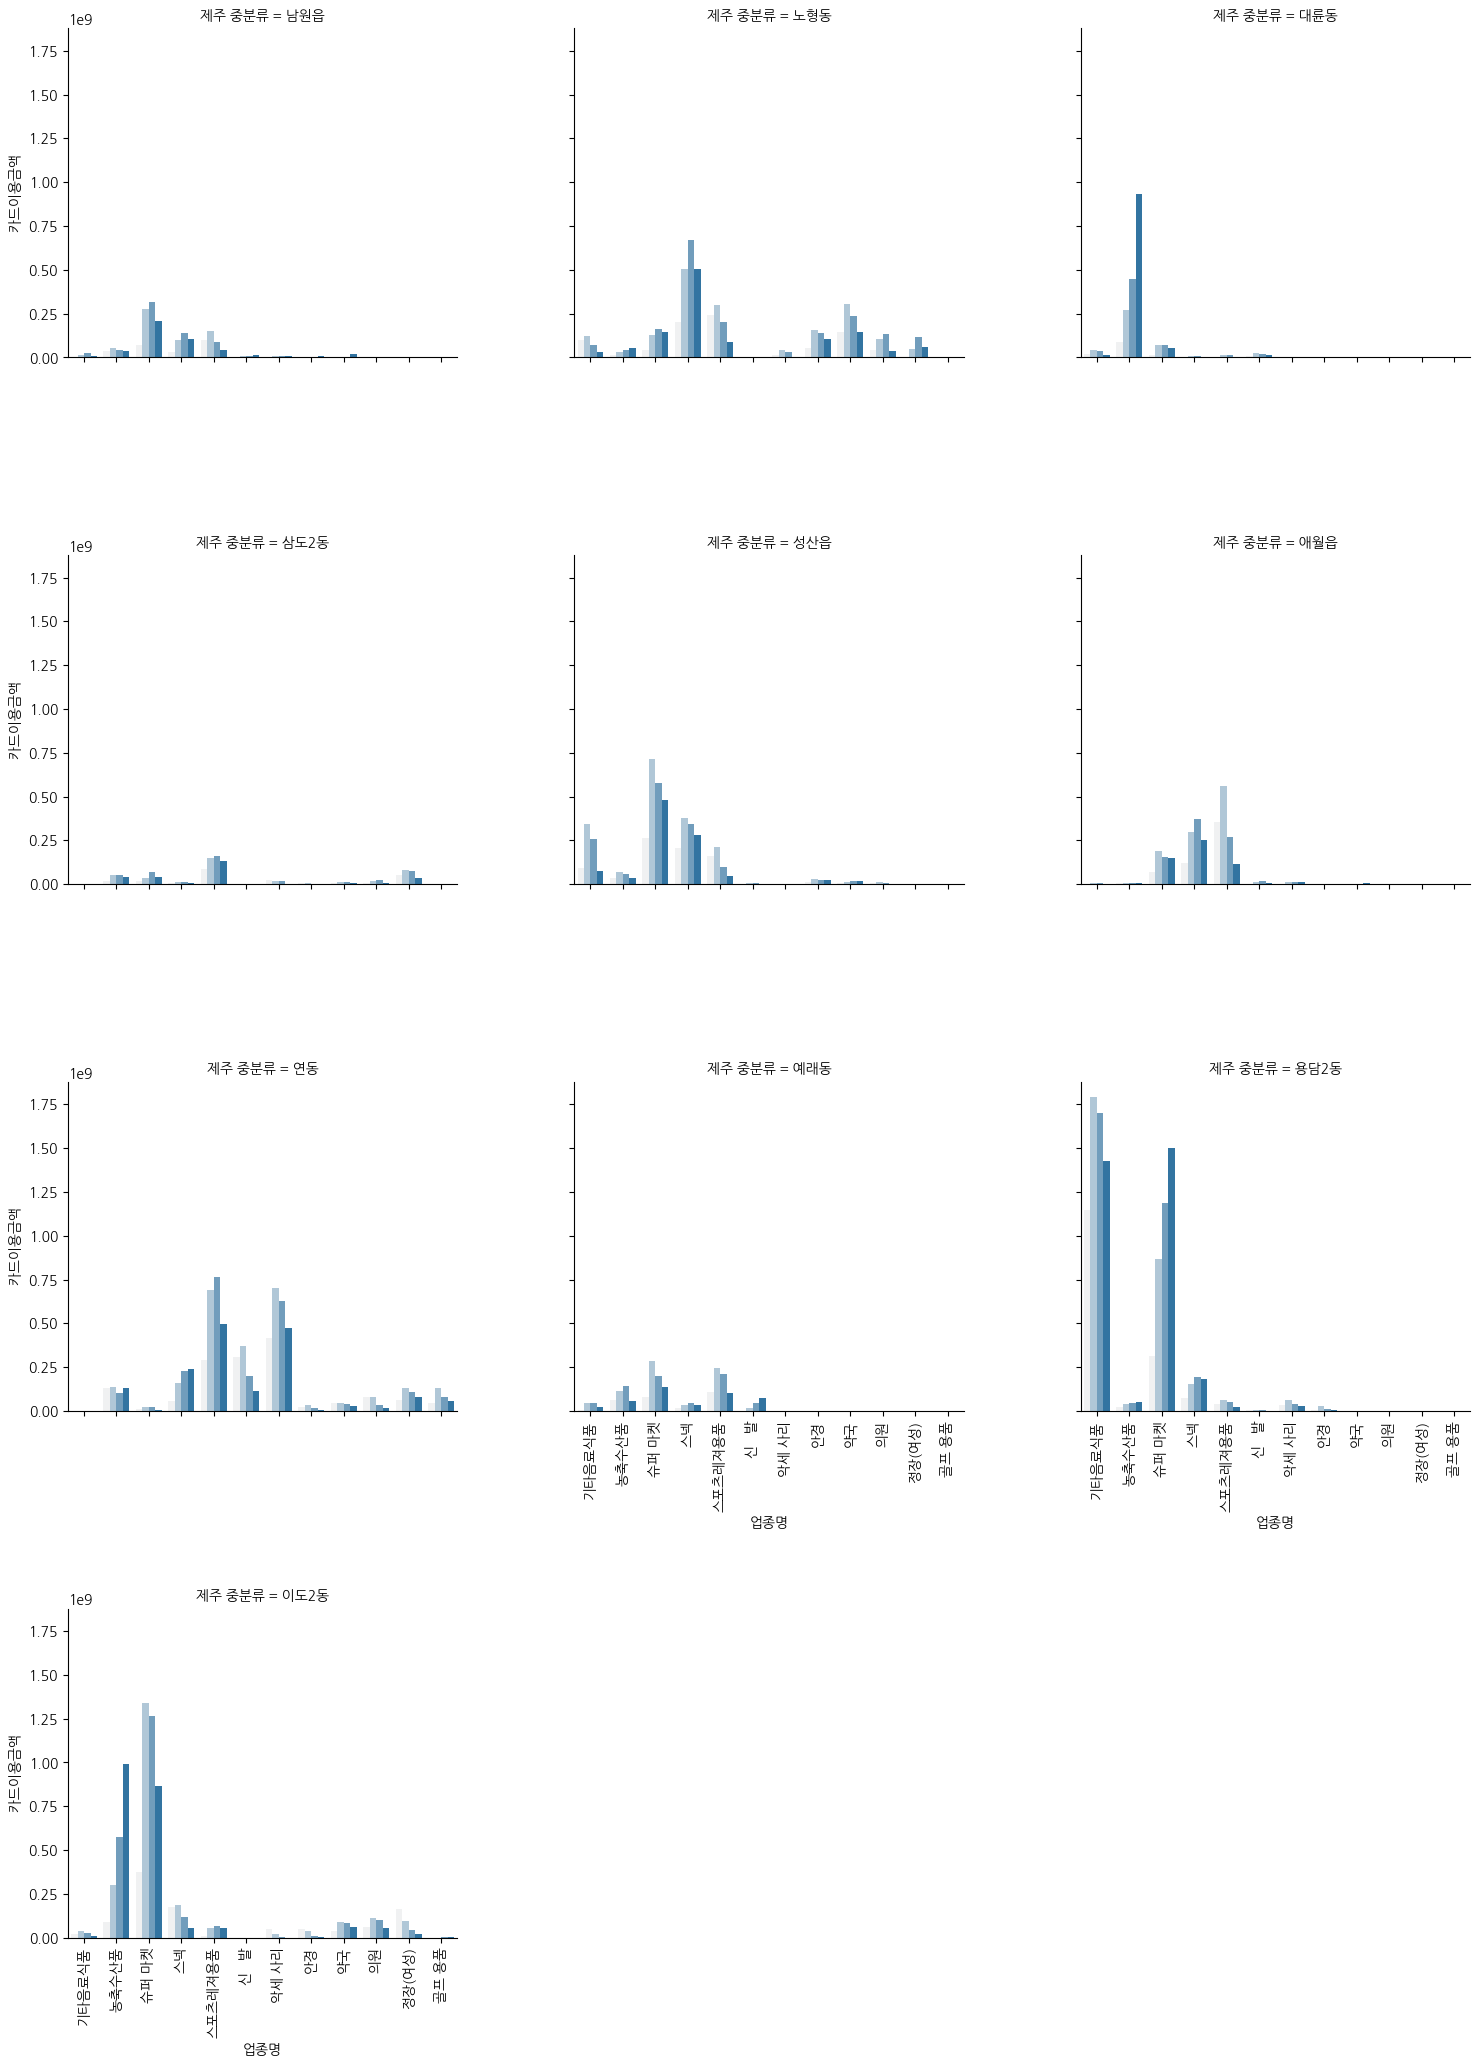

In [54]:
plt.figure(figsize=(25, 25))
g = sns.FacetGrid(jeju_generation_use, col="제주 중분류", col_wrap=3, height=5)
g.map(sns.barplot, '업종명', ' 카드이용금액 ','연령대별')

# Adjust x-axis label rotation for each subplot
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=90)

plt.subplots_adjust(wspace=0.3, hspace=0.6)
plt.show()

- 많은 소비가 먹는것에서 많이 일어난다
- 연동에서는 엑세러리에 대한 소비도 일어났다

In [28]:
gender_type_use =df.groupby(['업종명','성별'])[' 카드이용금액 '].sum().reset_index()

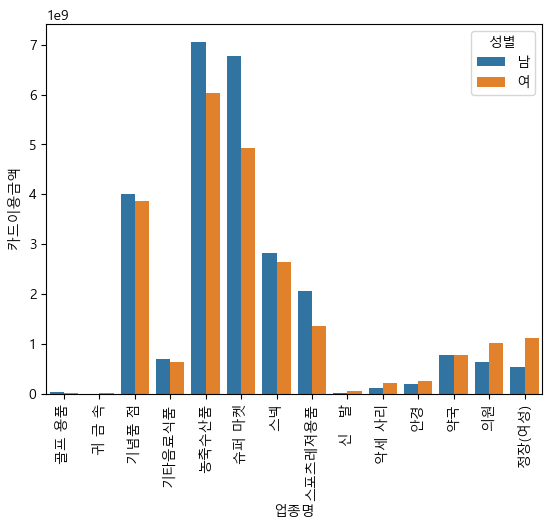

In [29]:
sns.barplot(data=gender_type_use,x='업종명',y=' 카드이용금액 ',hue='성별')
plt.xticks(rotation=90)
plt.show()

- 남성의 소비가 크고 의원과 엑세서리등은 여성의 소비 남성보다 높다

In [30]:
generation_type_use =df.groupby(['업종명','연령대별'])[' 카드이용금액 '].sum().reset_index()

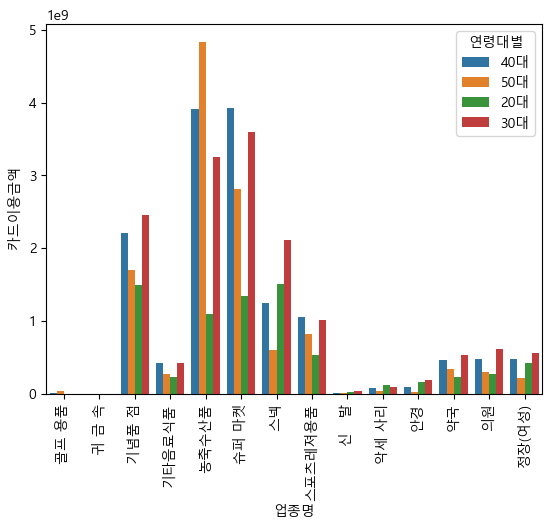

In [31]:
sns.barplot(data=generation_type_use,x='업종명',y=' 카드이용금액 ',hue='연령대별')
plt.xticks(rotation=90)
plt.show()

- 50대는 농축수산품에 구매력이 높다
- 30대 40대는 돈도 벌고 해서 먹는것과 기념품 스포츠레저용품을 각 업종비율에서 높게 차지한다.
- 의외인 점에선 30대에 정장을 구매한다는것이다


In [37]:
month_money_used=df.groupby('월')[' 카드이용금액 '].sum().reset_index()

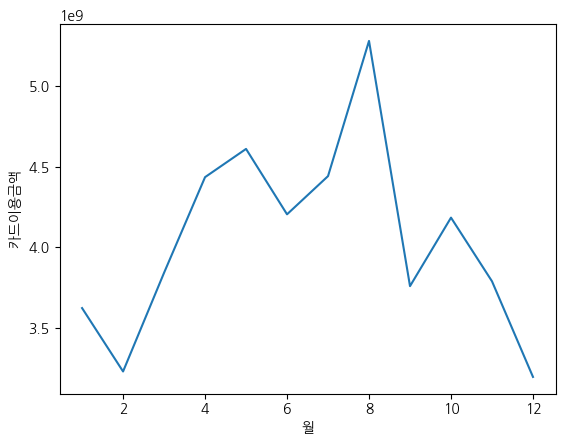

In [38]:
sns.lineplot(data=month_money_used,x='월',y=' 카드이용금액 ')
plt.show()

- 여름 휴가인 8월에 관광객이 많아 카드 이용금액도 제일 높게 형성되어있다

In [39]:
month_gender_money_used=df.groupby(['월','성별'])[' 카드이용금액 '].sum().reset_index()

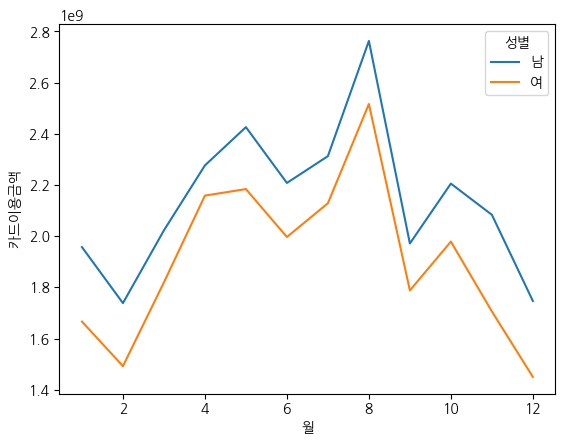

In [40]:
sns.lineplot(data=month_gender_money_used,x='월',y=' 카드이용금액 ',hue='성별')
plt.show()

- 남성이 소비가 여성보다 높게 형성되어 있다

In [41]:
month_generation_money_used=df.groupby(['월','연령대별'])[' 카드이용금액 '].sum().reset_index()

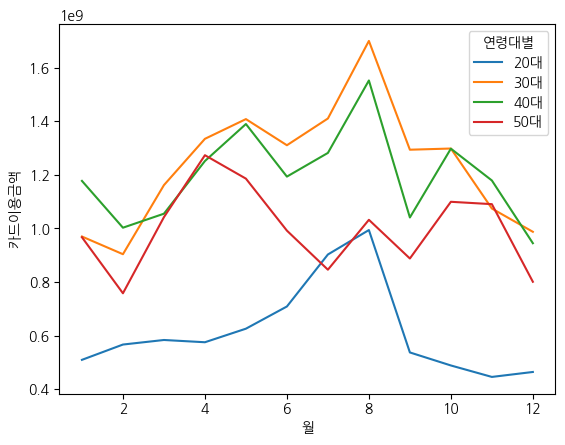

In [42]:
sns.lineplot(data=month_generation_money_used,x='월',y=' 카드이용금액 ',hue='연령대별')
plt.show()

- 30대가 소비력이 제일 강하게 형성되어 있다

<Axes: ylabel='건당이용금액'>

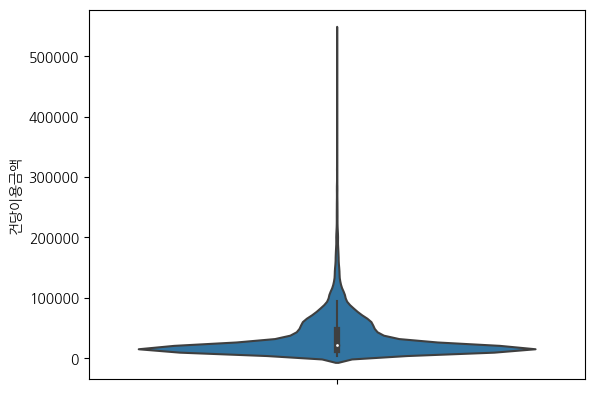

In [44]:
sns.violinplot(data=df, y='건당이용금액')

<Axes: ylabel=' 카드이용금액 '>

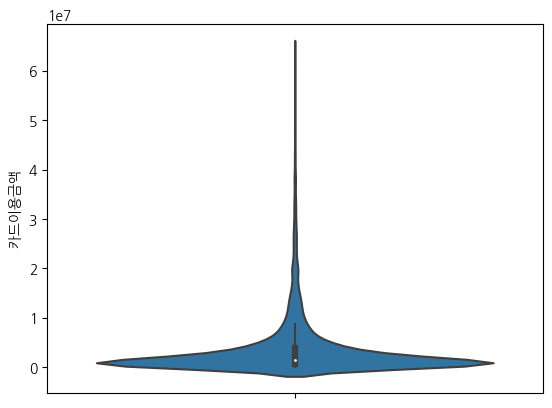

In [45]:
sns.violinplot(data=df, y=' 카드이용금액 ')

In [ ]:
month__money_used=df.groupby(['성별','업종명'])[' 건당이용금액'].().reset_index()